# 1. - Preparación de los datos para el tratamiento

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings
import sys
sys.path.append('../src')  # Asegúrate de que ../src es la carpeta donde está Funciones_Ayuda.py
import funciones as f  # Ahora debería importarse correctamente
sys.path.remove('../src')
from scipy.stats import chi2_contingency

sys.path.append('../src')  # Asegúrate de que ../src es la carpeta donde está Funciones_Ayuda.py
import funciones as f  # Ahora debería importarse correctamente
sys.path.remove('../src') ### MÓDULO CON FUNCIONES QUE VOY A USAR

warnings.filterwarnings("ignore")

## Configuro la visualización de mis datasets
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# Ruta de los archivos
ruta_categoricas_visualizacion = '../data/variables/lista_categoricas_visualizacion.txt'
ruta_categoricas_definitivo = '../data/variables/lista_categoricas_definitivo.txt'
ruta_deleted_variables = '../data/variables/deleted_variables.txt'

# Leer las listas desde los archivos
with open(ruta_categoricas_visualizacion, 'r') as f:
    lista_categoricas_visualizacion = [line.strip() for line in f]

with open(ruta_categoricas_definitivo, 'r') as f:
    lista_categoricas_definitivo = [line.strip() for line in f]

with open(ruta_deleted_variables, 'r') as f:
    deleted_variables = [line.strip() for line in f]

# Imprimir las listas para verificar
print("Lista Categoricas Visualizacion:", lista_categoricas_visualizacion)
print("Lista Categoricas Definitivo:", lista_categoricas_definitivo)
print("Deleted Variables:", deleted_variables)




Lista Categoricas Visualizacion: ['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CIT

In [3]:
df_loan = pd.read_csv('../data/application_data.csv')

In [4]:
df_loan.dtypes.sort_values().to_frame('tipo').groupby('tipo').size().to_frame('cantidad').reset_index()

tipo  cantidad
0    int64        41
1  float64        65
2   object        16

In [5]:
df_loan = df_loan.drop(columns=deleted_variables, errors='ignore') ## errors= ignore sirve para que si hay columans que no están en el df se siga ejecutando
df_loan.dtypes.sort_values().to_frame('tipo').groupby('tipo').size().to_frame('cantidad').reset_index()

tipo  cantidad
0    int64        41
1  float64        50
2   object        15

# 1.1. - Separación en train y test

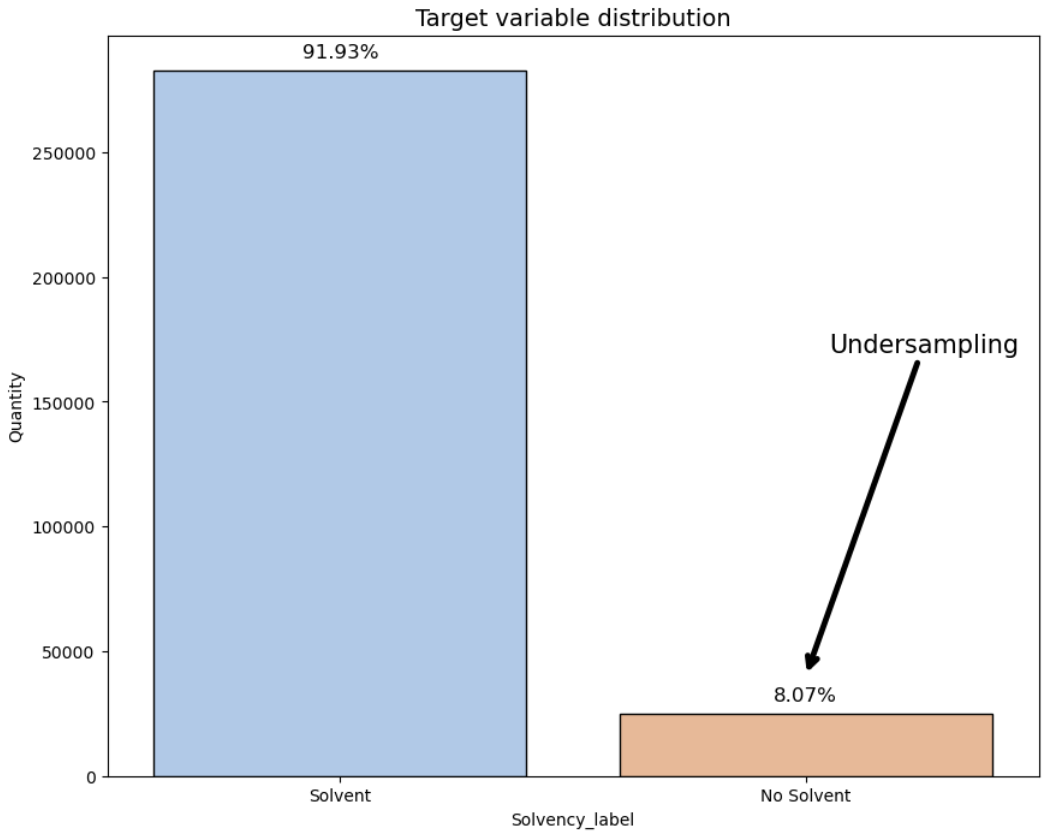

ref: NOTEBOOK: 01_Exploración_general

In [6]:
from sklearn.model_selection import train_test_split

## Como tenemos un dataset con undersampling, vamos aplicar stratify para que la proporción se 
## mantenga
x_train, x_test, y_train, y_test = train_test_split(df_loan.drop('TARGET', axis=1),
                                                    df_loan['TARGET'],
                                                    stratify=df_loan['TARGET'],
                                                    test_size=0.2)

df_loan_train = pd.concat([x_train, y_train], axis=1)
df_loan_test = pd.concat([x_test, y_test], axis=1)

In [9]:
## Comprobación de que se han mantenido las distribuciones 
print('== Train\n', df_loan_train['TARGET'].value_counts(normalize=True))
print('== Test\n', df_loan_test['TARGET'].value_counts(normalize=True))
df_loan_train.head()

== Train
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
== Test
 TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
306165      454730         Cash loans           M            Y   
60051       169624         Cash loans           F            N   
57192       166289         Cash loans           F            N   
52572       160884         Cash loans           M            Y   
155124      279812         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
306165               Y             0           90000.0    948582.0   
60051                N             0          103500.0    284400.0   
57192                N             1          157500.0   1626133.5   
52572                N             0           99000.0    269550.0   
155124               Y             0          189000.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
306165      27864.0         679500.0   Unaccompanied               Working   
60051       14854.5         225000.0          Family  Commercial associate   
57192       51057.0        1485000.0   Unaccompanied         State servant   
52572       18364.5         225000.0   Unaccompanied               Working   
155124      42813.0         585000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
306165  Secondary / secondary special            Married  House / apartment   
60051   Secondary / secondary special          Separated  House / apartment   
57192   Secondary / secondary special            Married  House / apartment   
52572   Secondary / secondary special            Married   Rented apartment   
155124  Secondary / secondary special     Civil marriage  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
306165                    0.035792      -16242          -1455   
60051                     0.024610      -18335          -6373   
57192                     0.010276      -15947          -3718   
52572                     0.030755      -14373           -444   
155124                    0.007274       -9602           -409   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
306165             -763.0            -4256          9.0           1   
60051             -4253.0            -1888          NaN           1   
57192             -2403.0            -4831          NaN           1   
52572             -3690.0            -1998         15.0           1   
155124            -4067.0            -1150          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
306165               1                0                 1           0   
60051                1                0                 1           1   
57192                1                0                 1           1   
52572                1                0                 1           0   
155124               1                1                 1           1   

        FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
306165           0                Drivers              2.0   
60051            0  Private service staff              1.0   
57192            0             Core staff              3.0   
52572            0                Drivers              2.0   
155124           0               Managers              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
306165                     2                            2   
60051                      2                            2   
57192                      2                            2   
52572                      2                            2   
155124                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
306165                   THURSDAY                       10   
60051                      MONDAY                       17   
57192                    THURSDAY                       16   
5

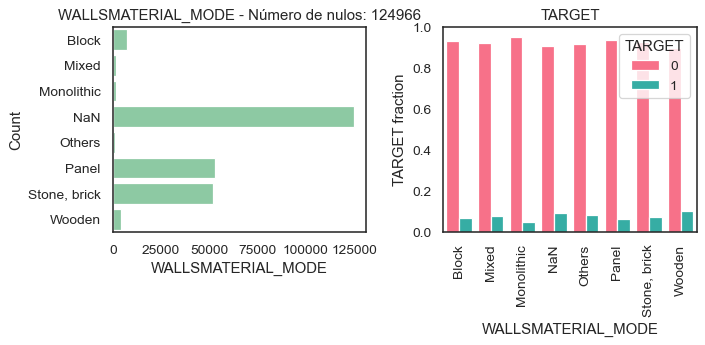

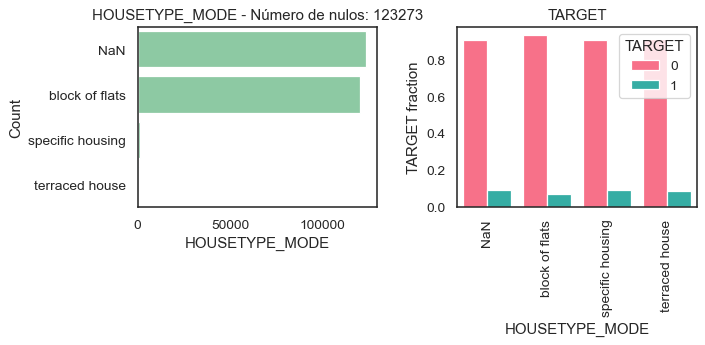

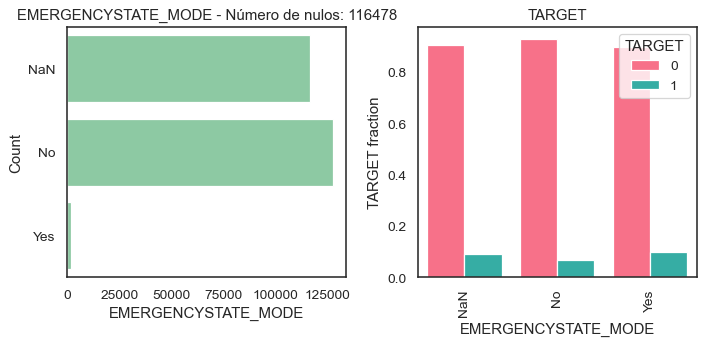

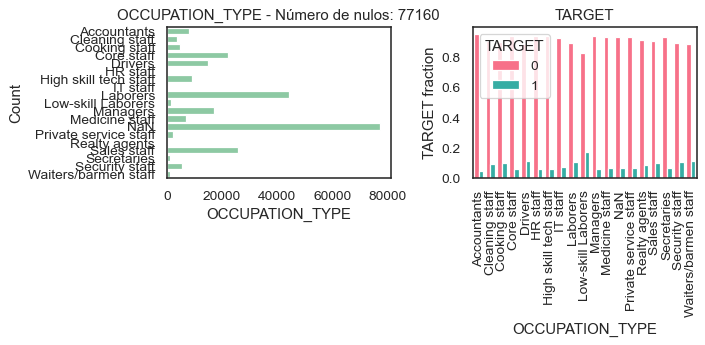

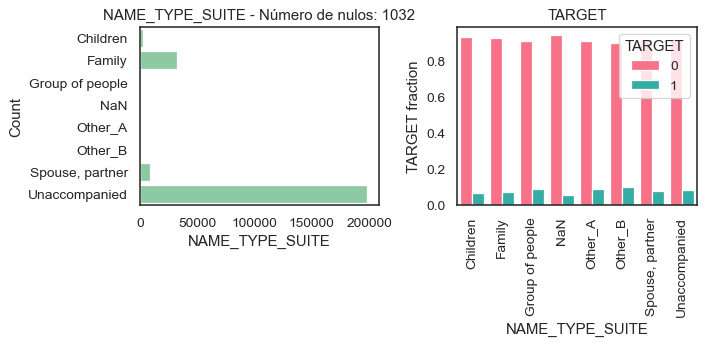

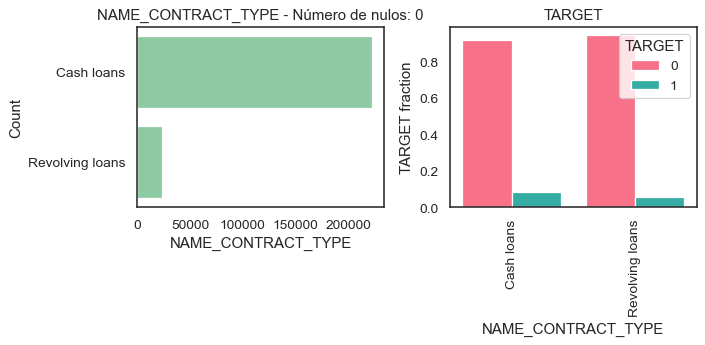

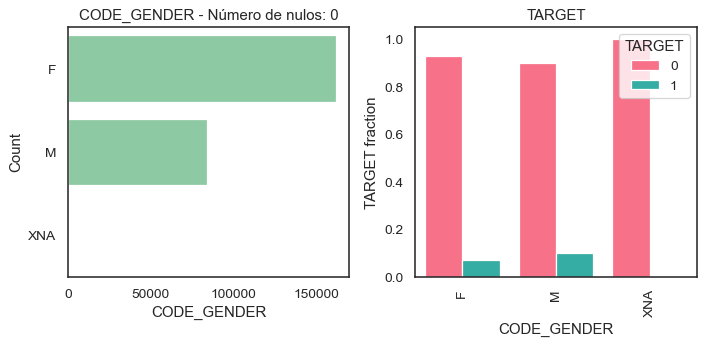

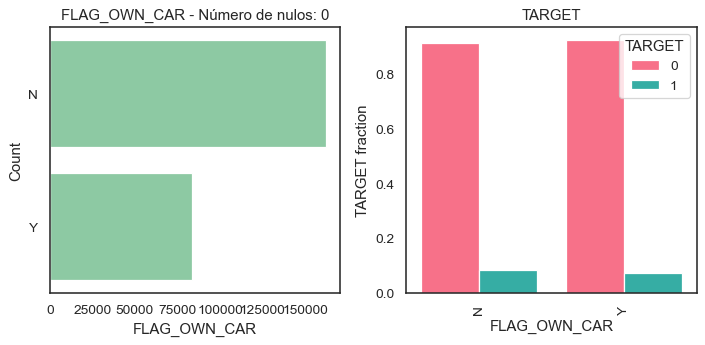

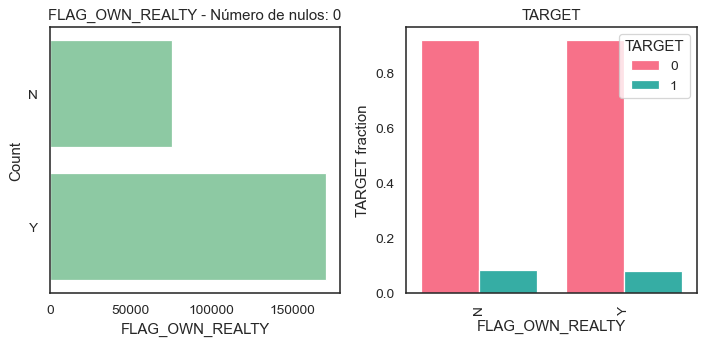

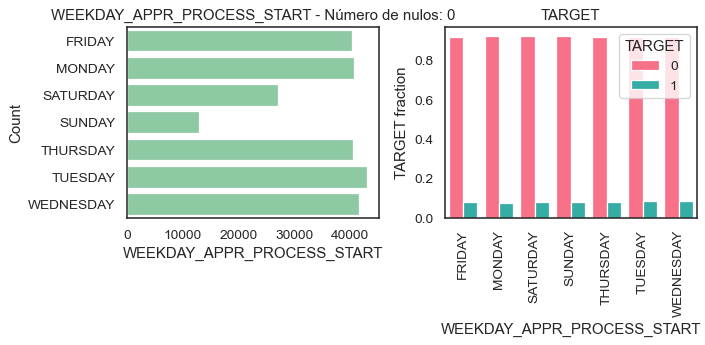

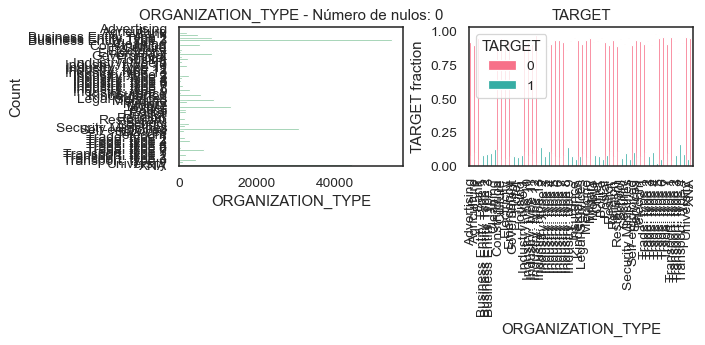

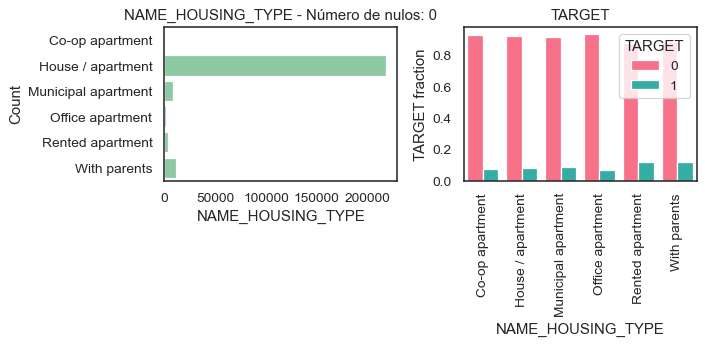

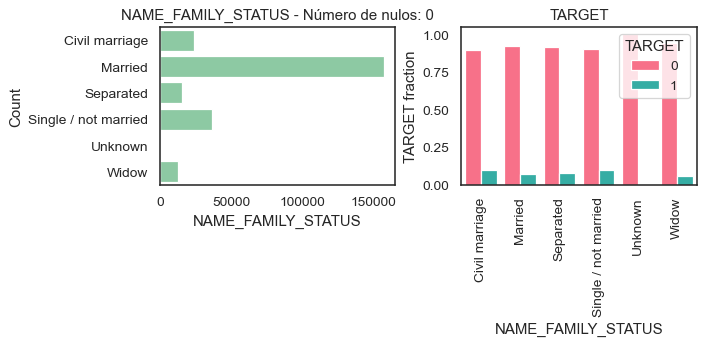

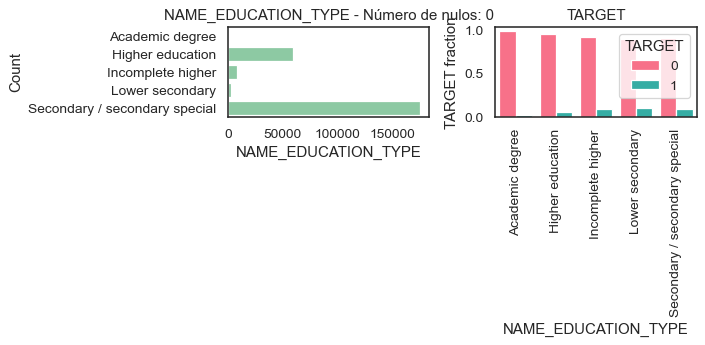

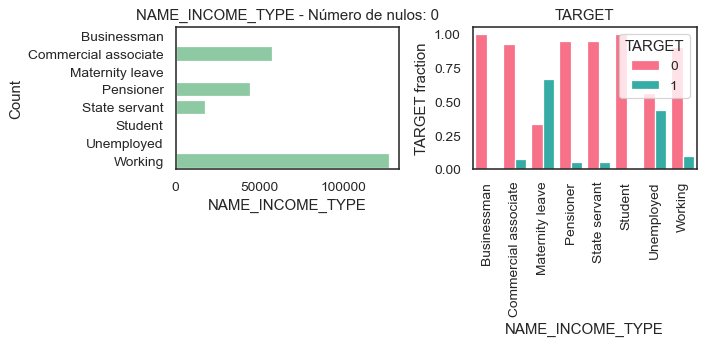

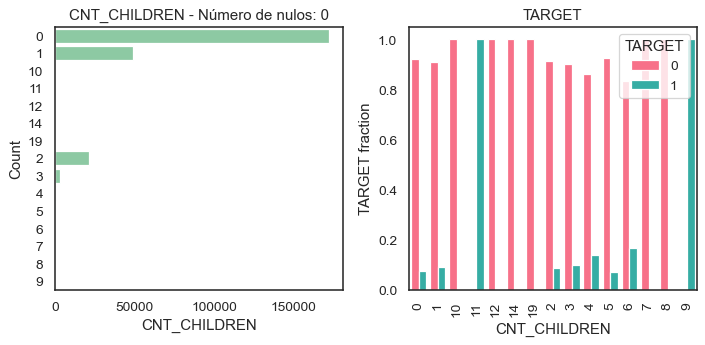

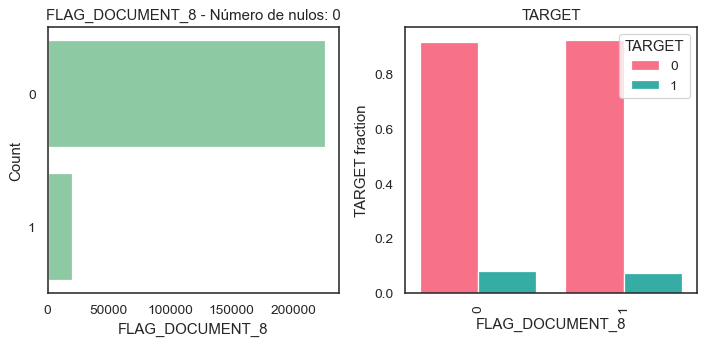

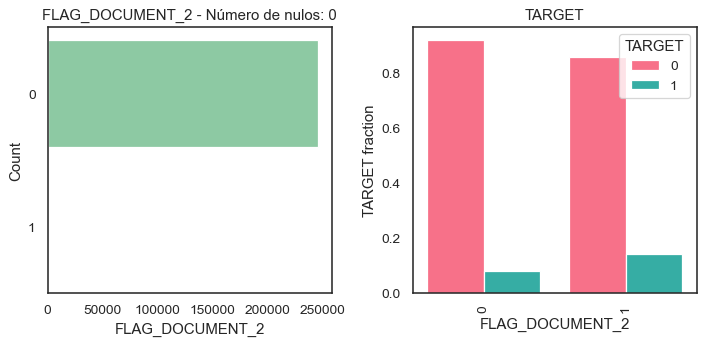

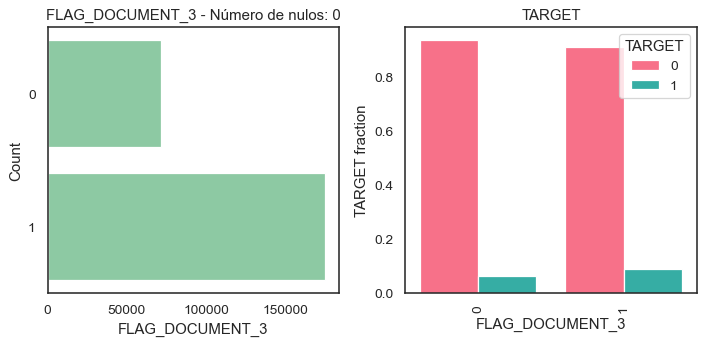

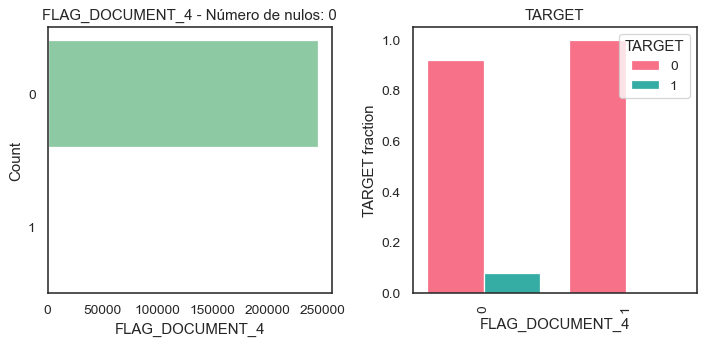

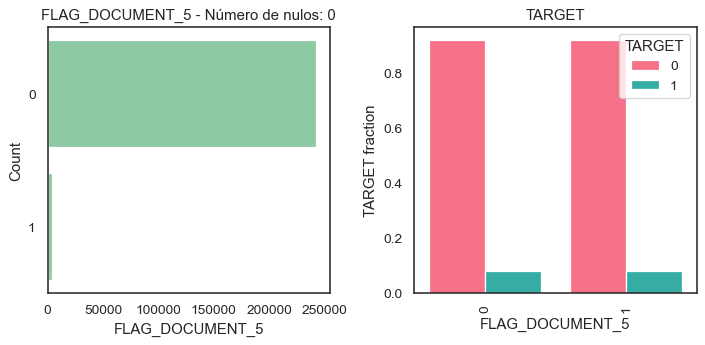

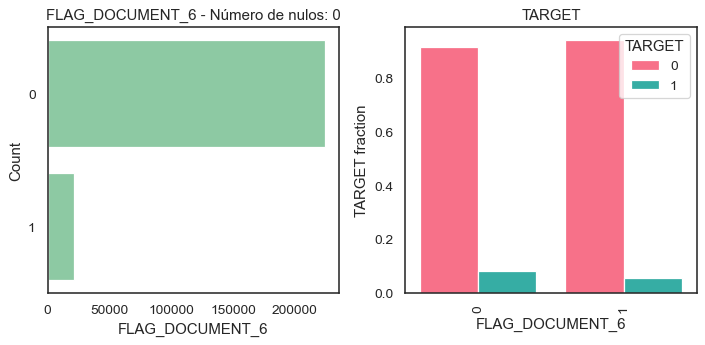

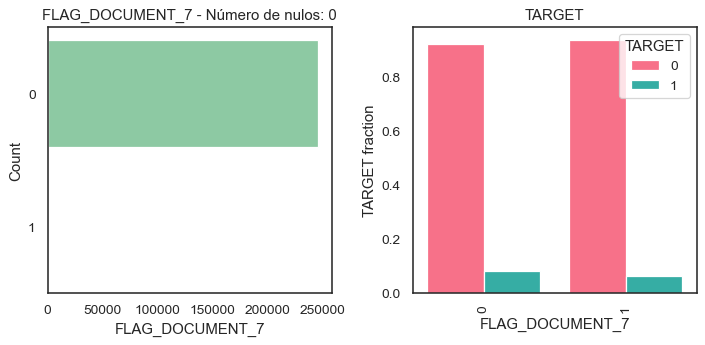

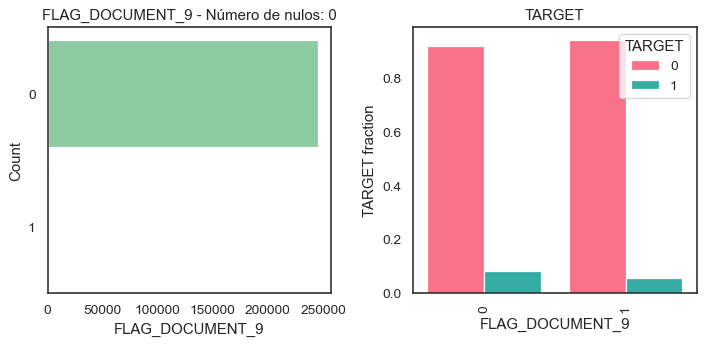

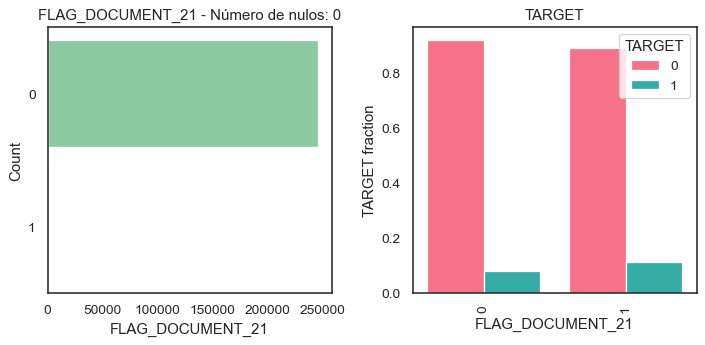

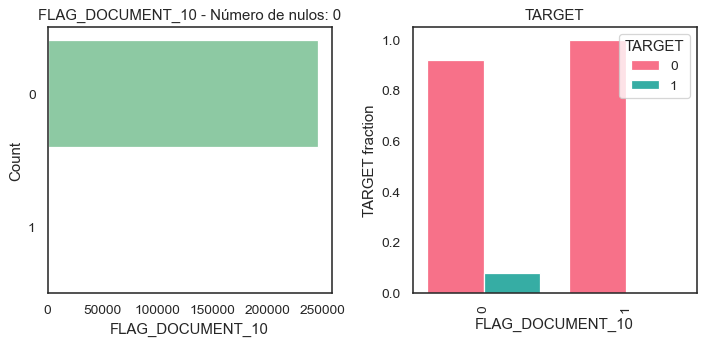

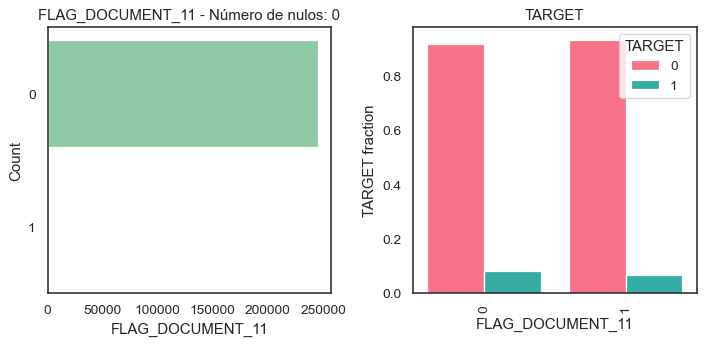

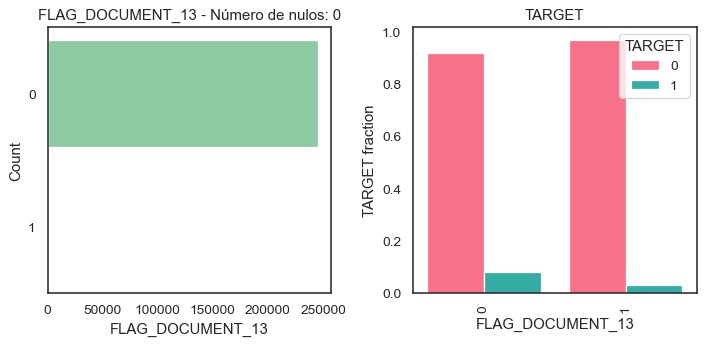

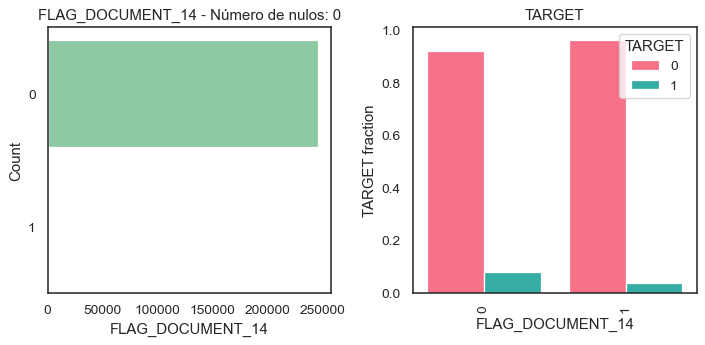

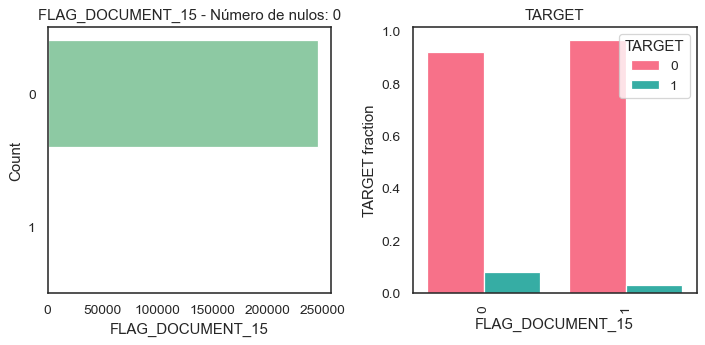

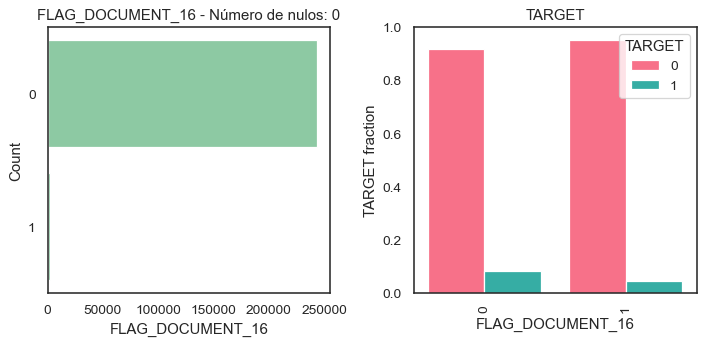

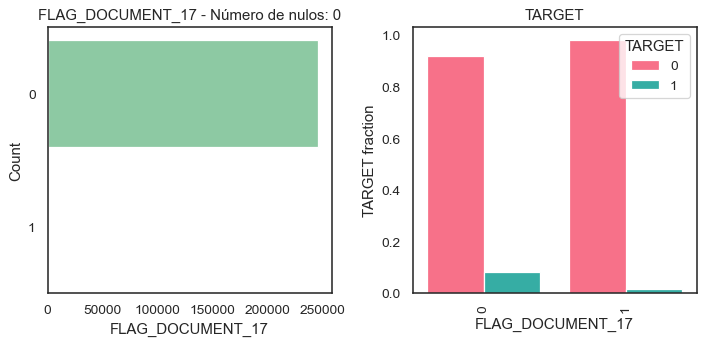

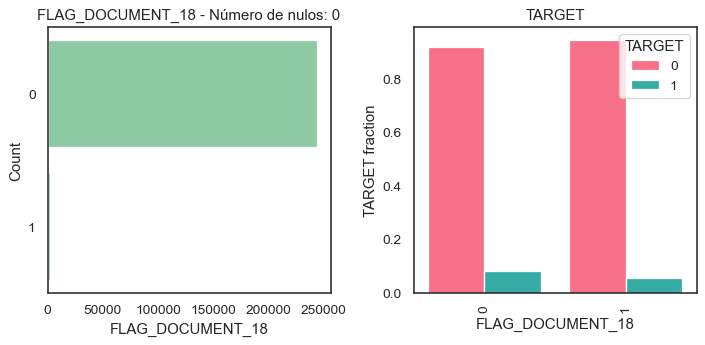

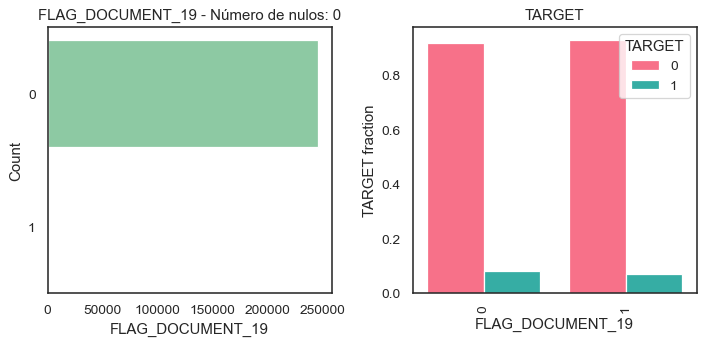

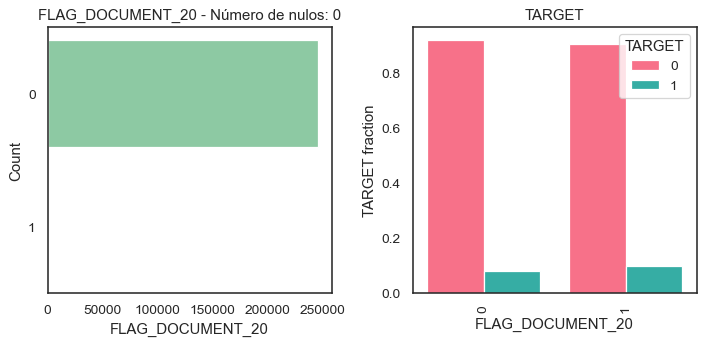

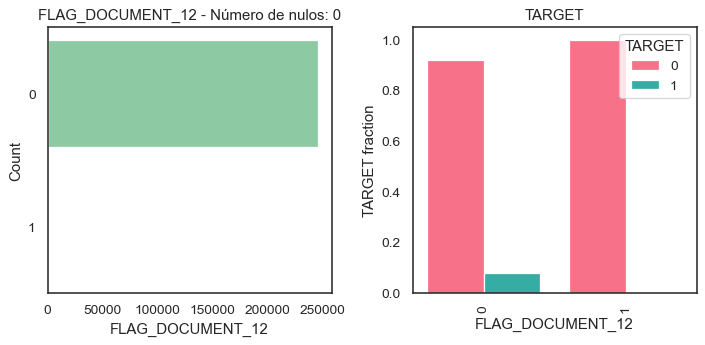

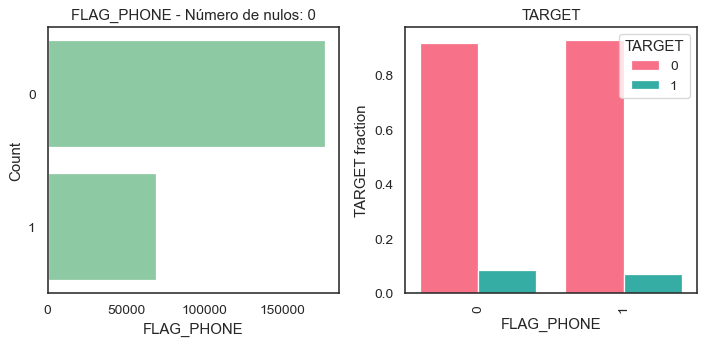

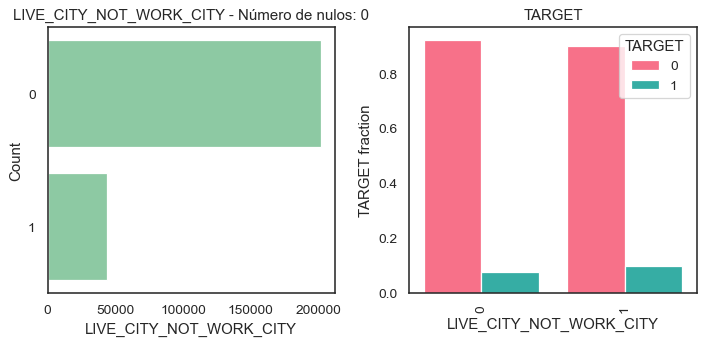

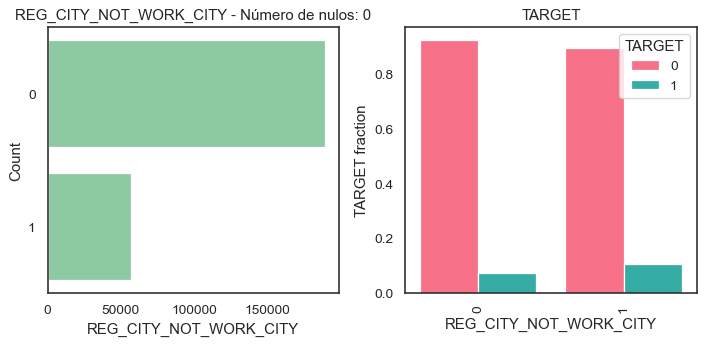

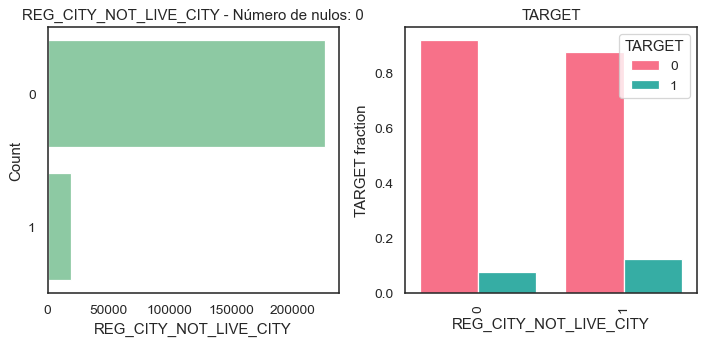

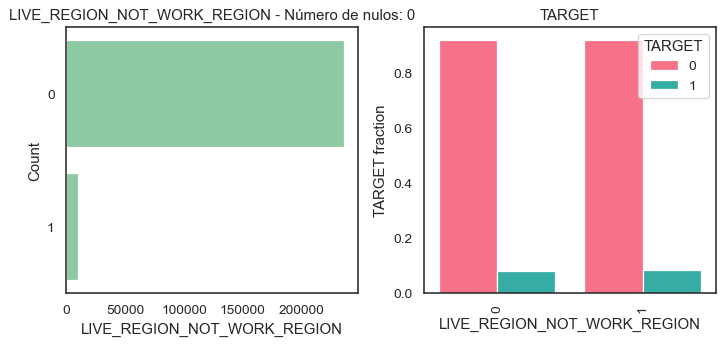

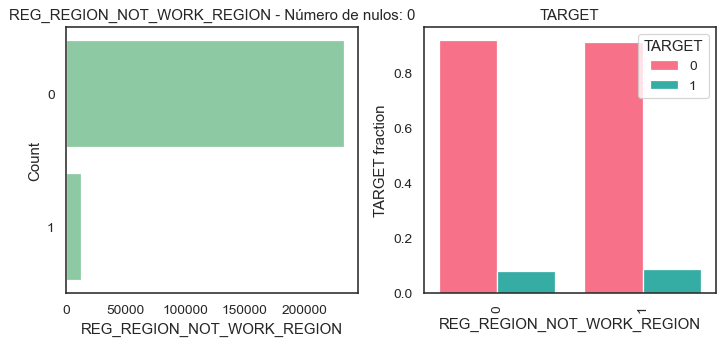

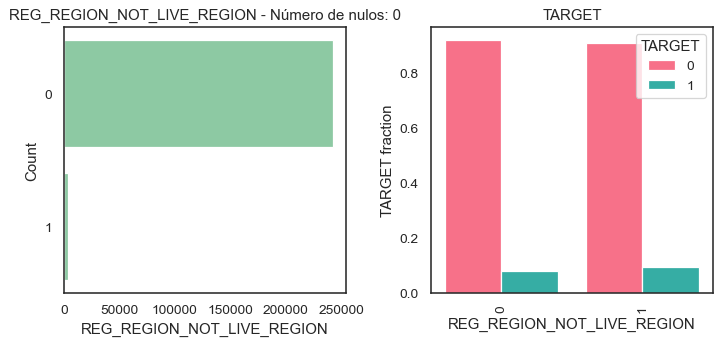

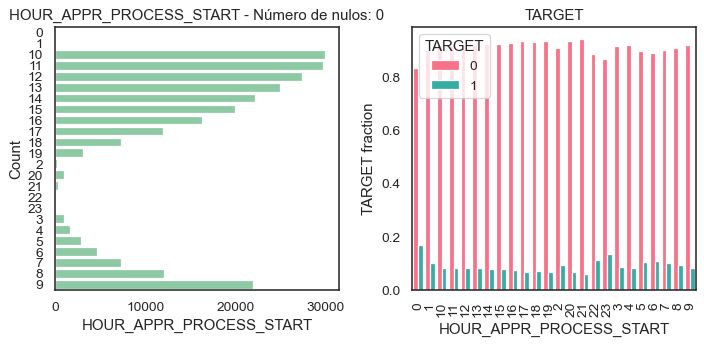

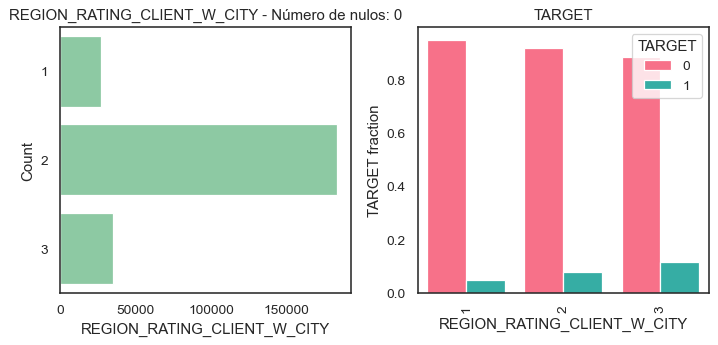

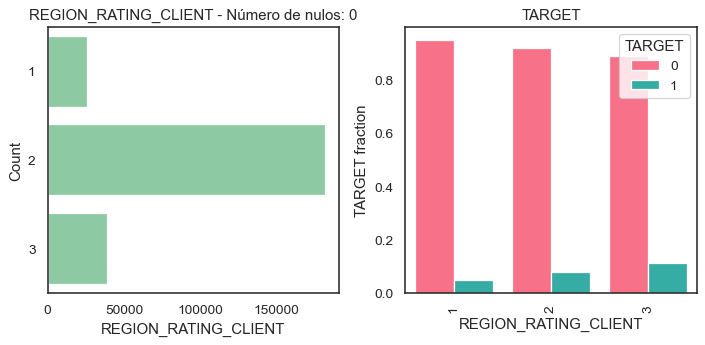

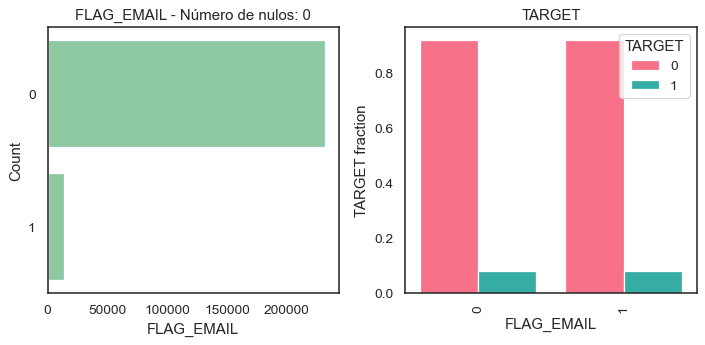

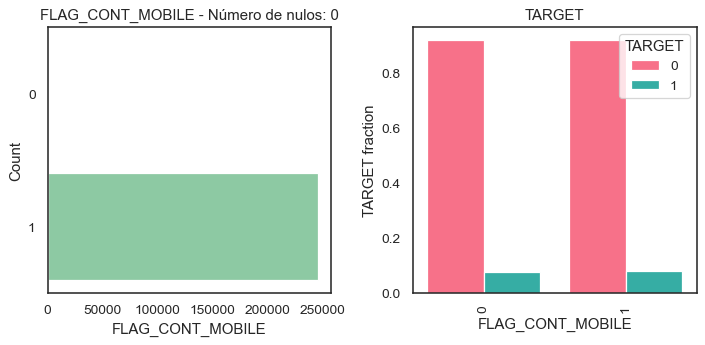

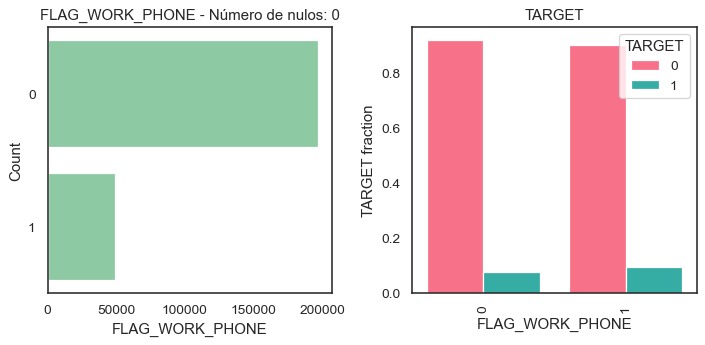

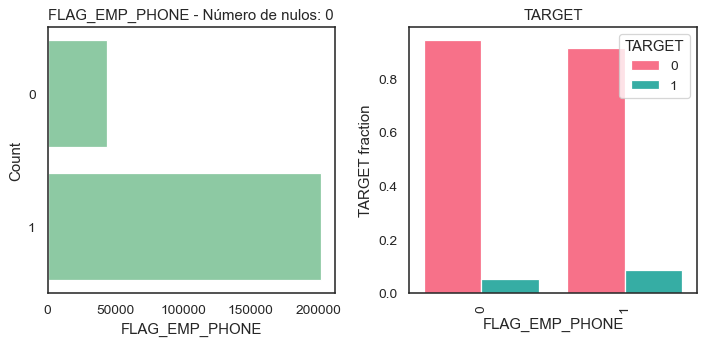

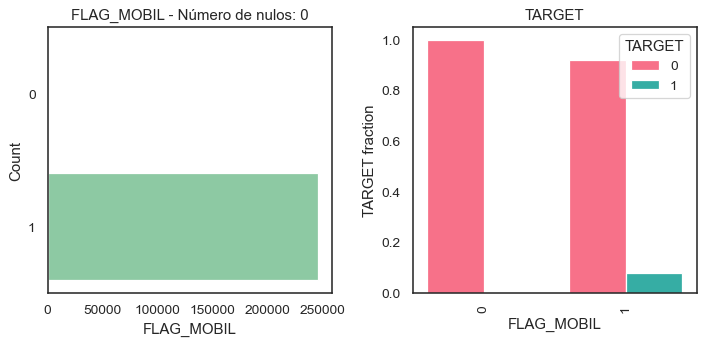

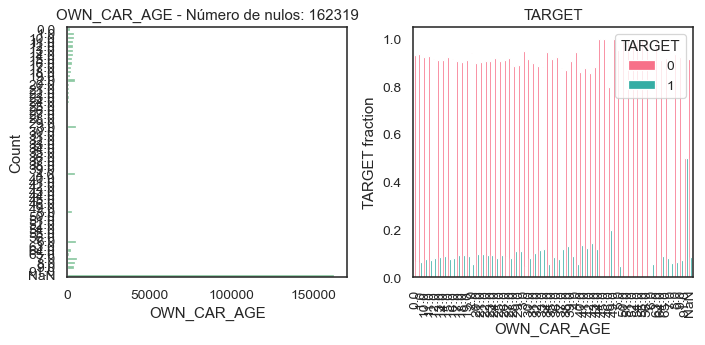

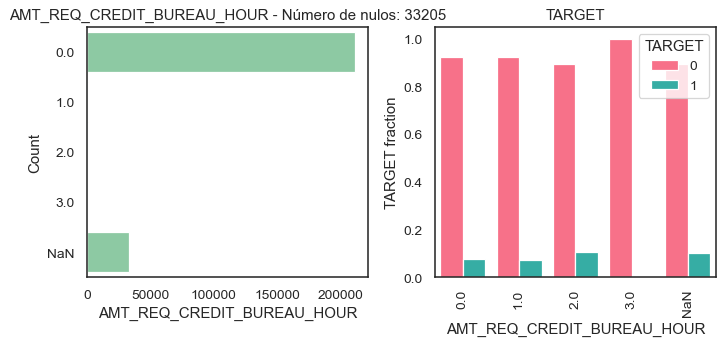

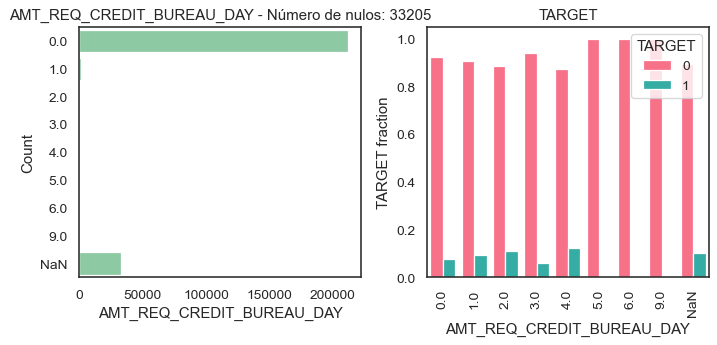

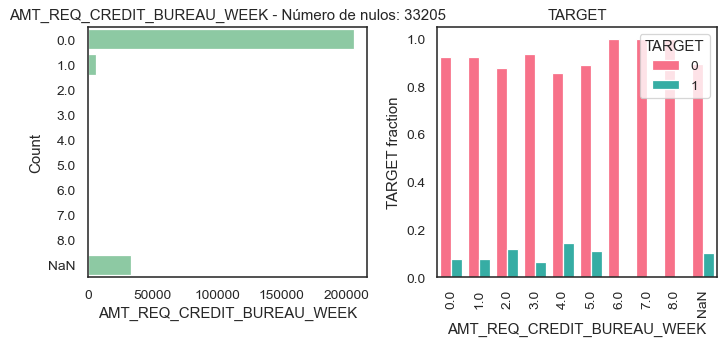

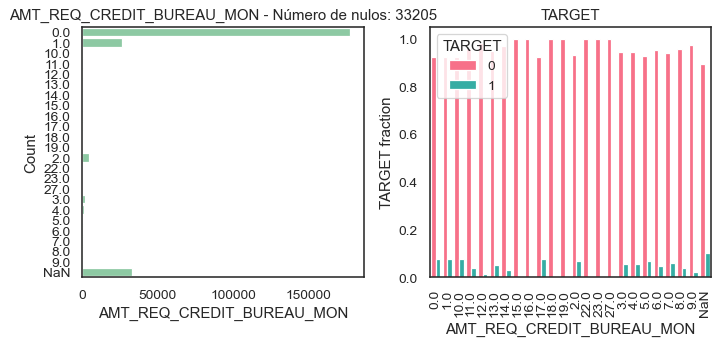

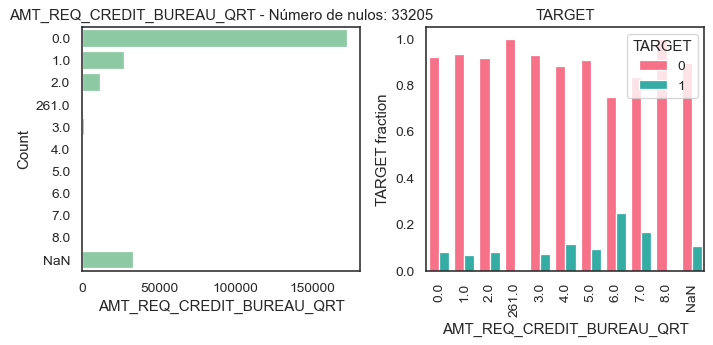

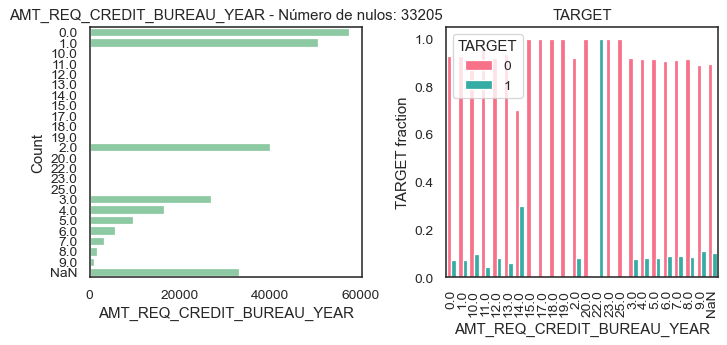

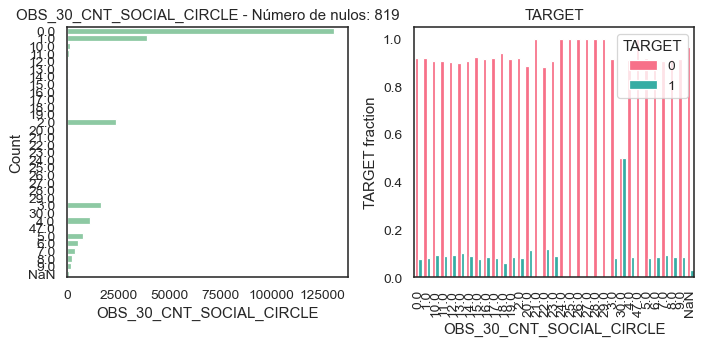

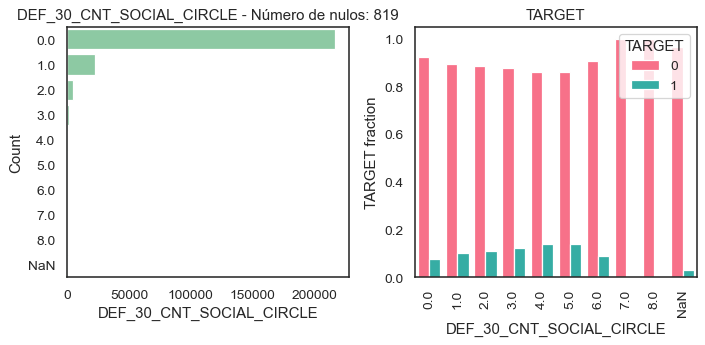

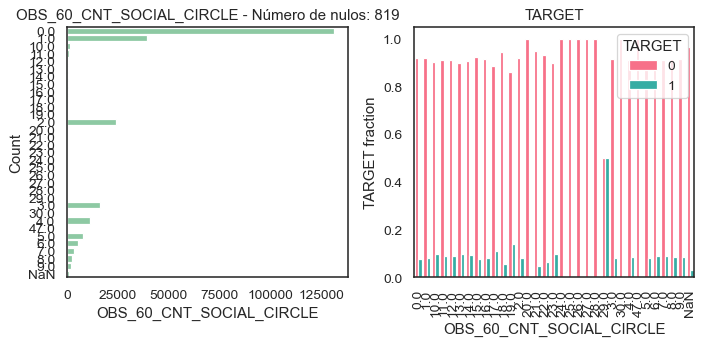

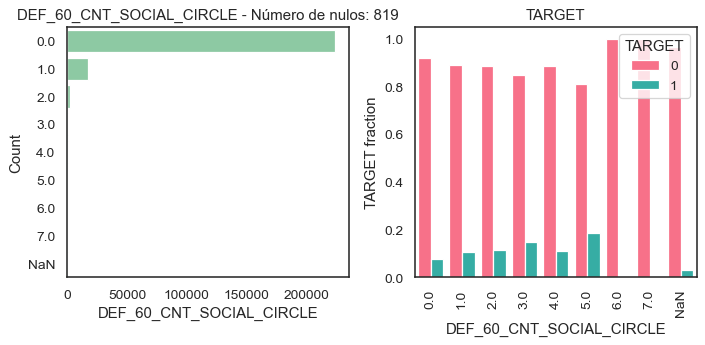

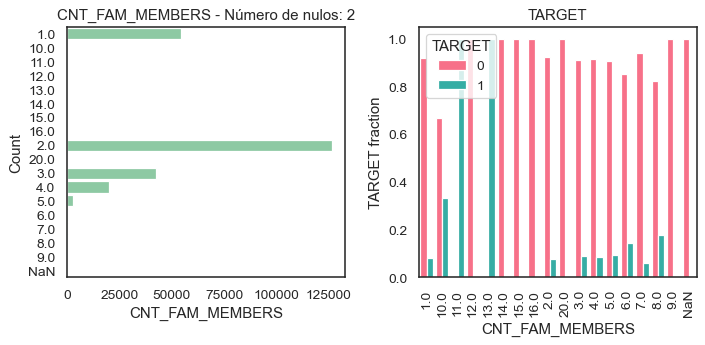

In [ ]:
# Ejemplo de uso en el bucle
for i in lista_categoricas_visualizacion:
    if i != 'TARGET':
        f.plot_feature(df_loan_train, col_name=i, isContinuous=False, target='TARGET')
    
    plt.show()  ## para que según se van generando vayan apareciendo


### Inferencias

Relación entre género y dificultad de pago: Los hombres suelen mostrar una mayor dificultad para devolver los préstamos en comparación con las mujeres, lo que puede ser un indicador relevante en los modelos de riesgo crediticio.

Tipo de préstamo y riesgo: Los préstamos en efectivo (Cash loans) están más asociados con la posibilidad de impago, lo que sugiere que este tipo de financiamiento puede tener un perfil de mayor riesgo.

Número de hijos (CNT_CHILDREN): Los solicitantes sin hijos tienen una mayor probabilidad de cumplir con los pagos en comparación con aquellos que tienen hijos, lo que podría reflejar una mayor estabilidad financiera en este grupo.

Zona de residencia (REGION_RATING_CLIENT_W_CITY): Existe una fuerte correlación entre la zona en la que viven los clientes y la probabilidad de impago. La calificación "3" para la región es donde se observa el mayor riesgo de incumplimiento, lo que podría estar relacionado con factores socioeconómicos específicos de estas áreas.

In [7]:
columnas_continuas = [col for col in df_loan_train.columns if col not in lista_categoricas_visualizacion]
print(columnas_continuas)

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE']


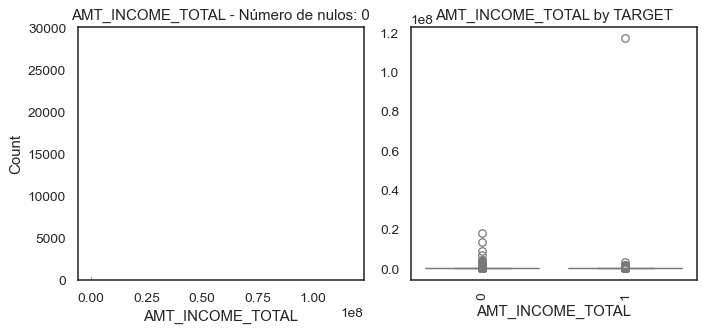

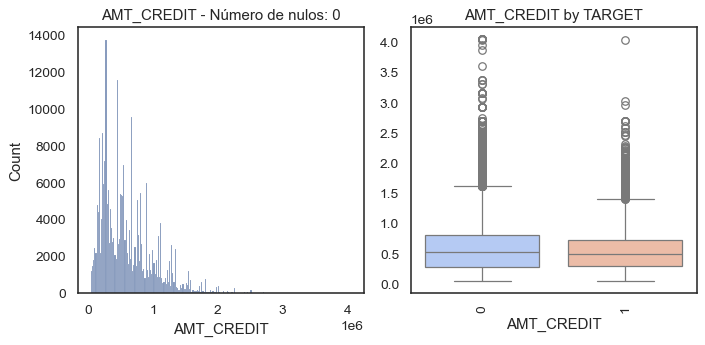

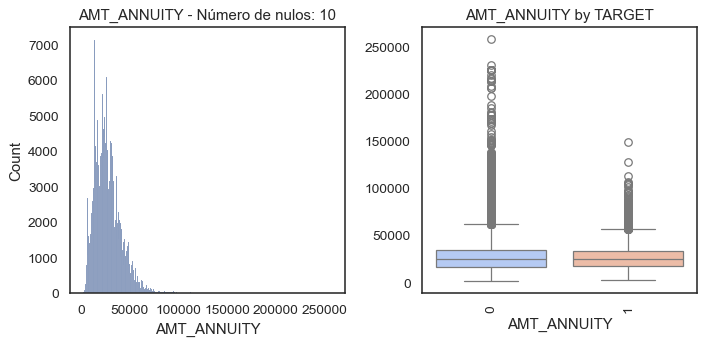

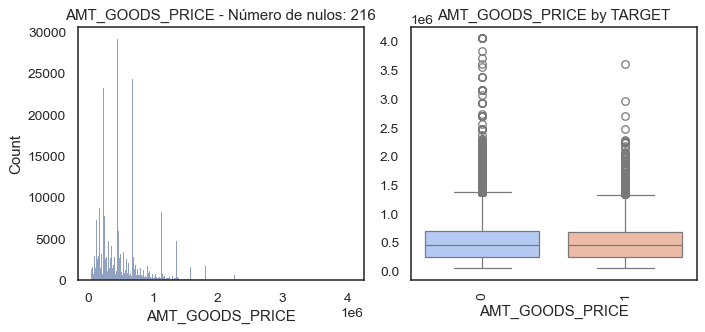

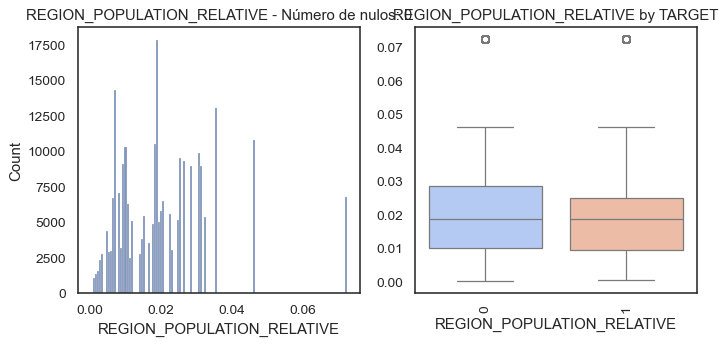

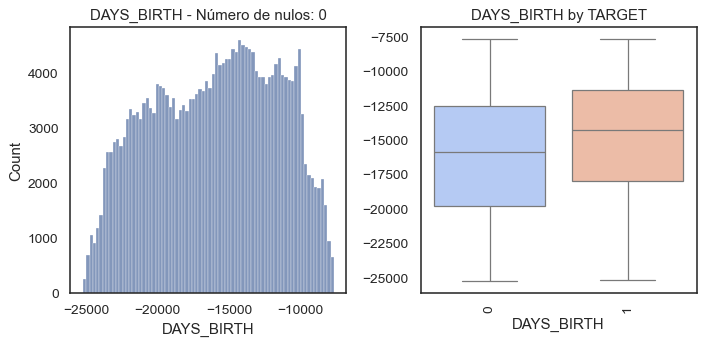

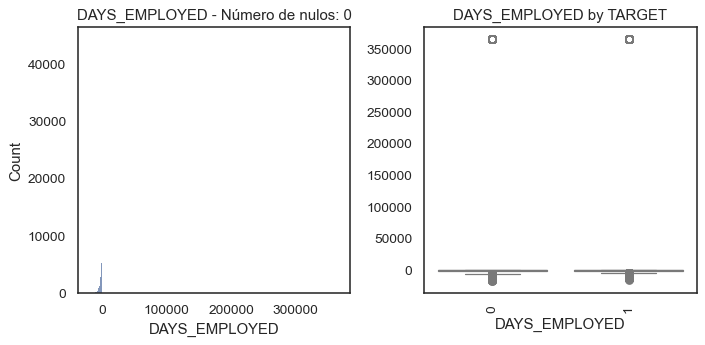

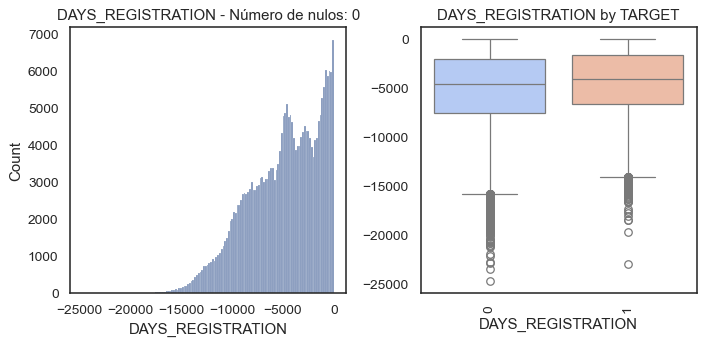

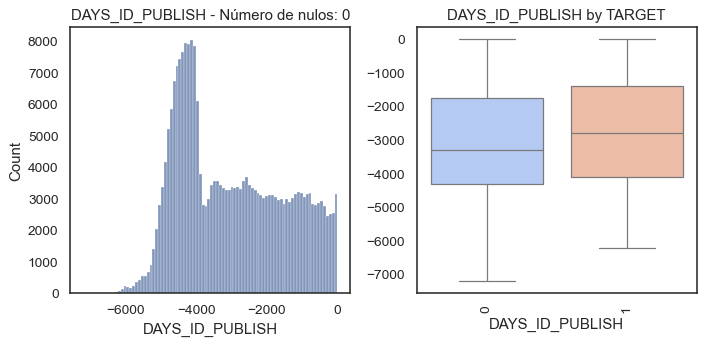

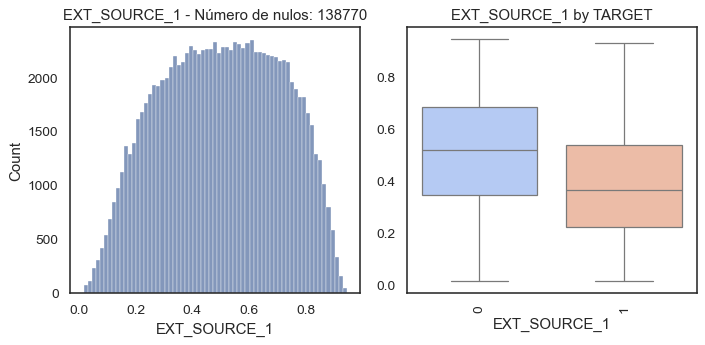

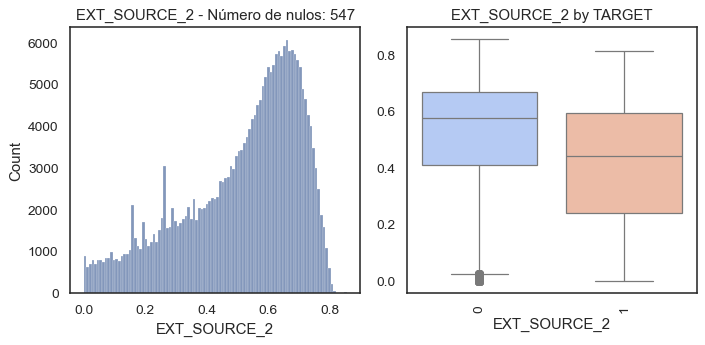

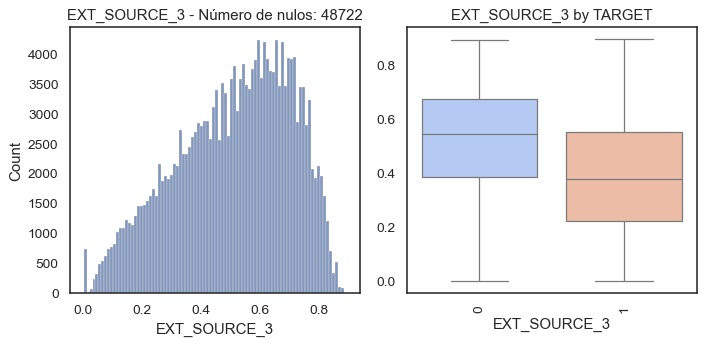

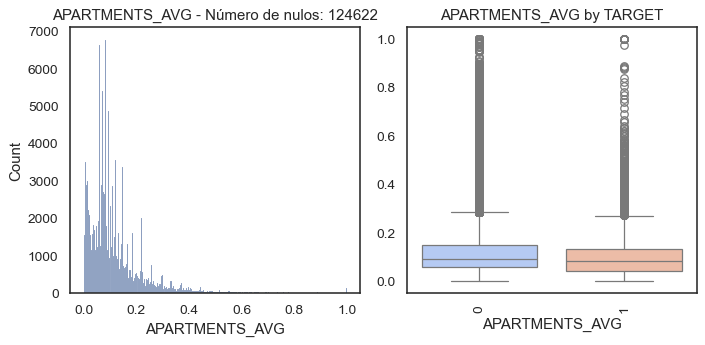

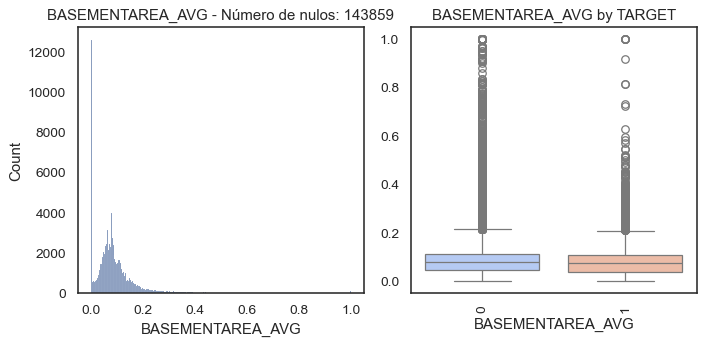

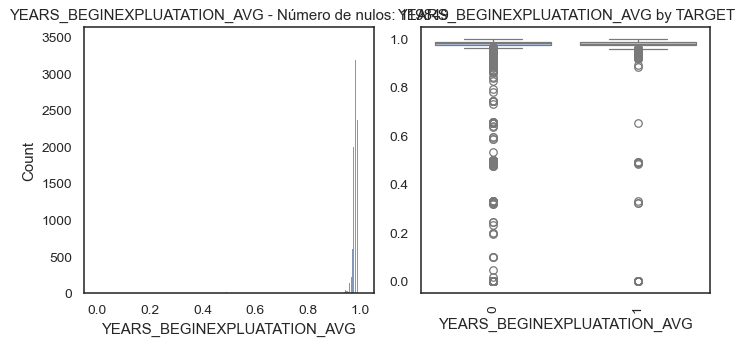

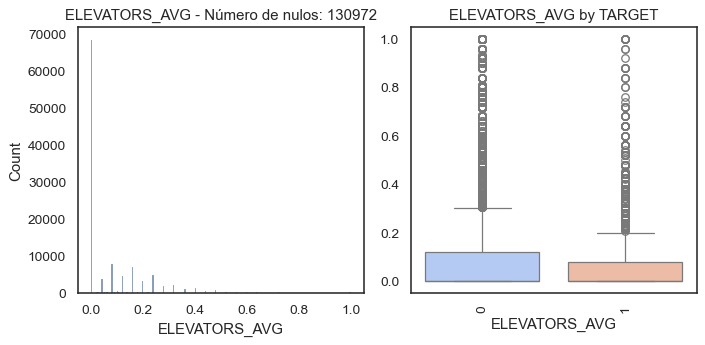

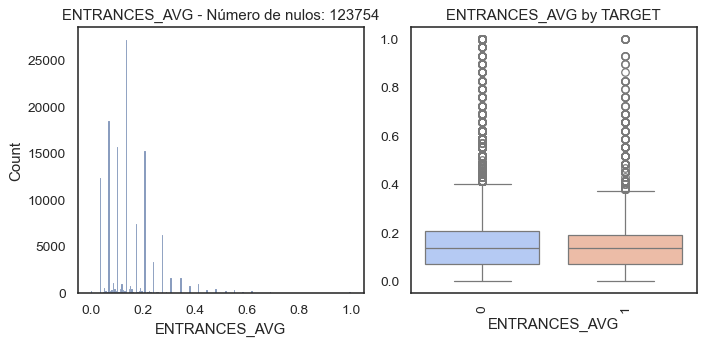

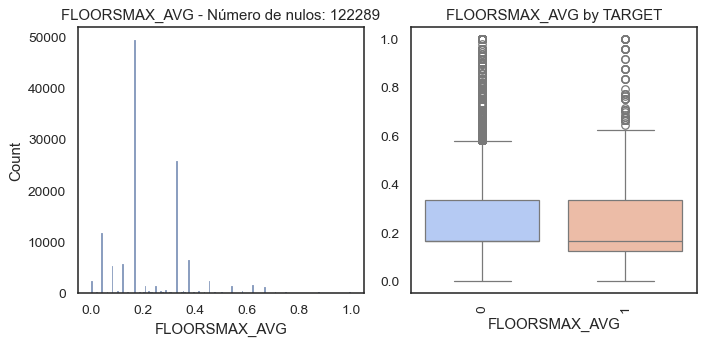

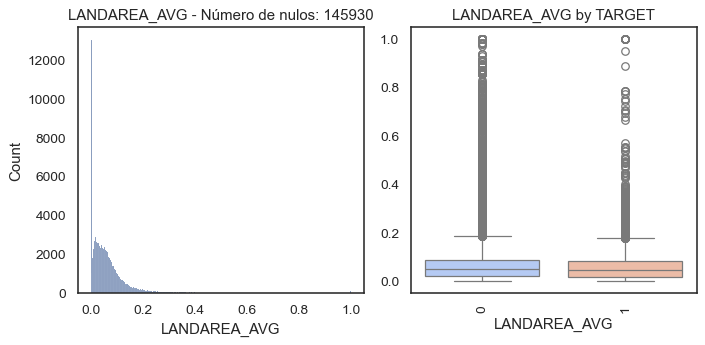

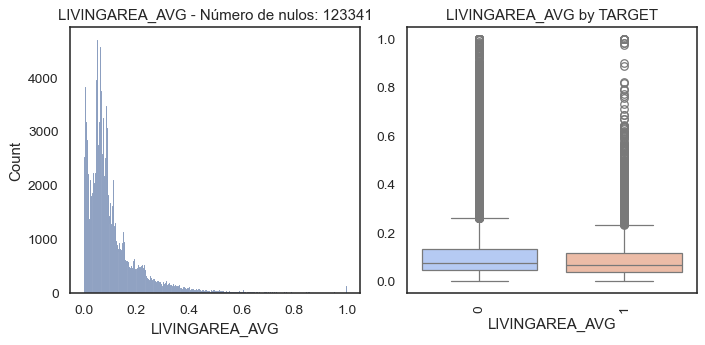

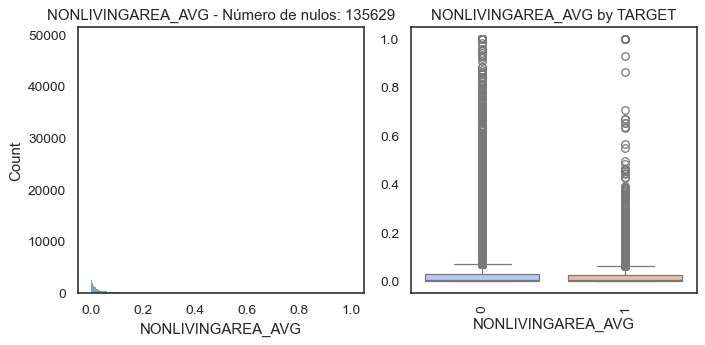

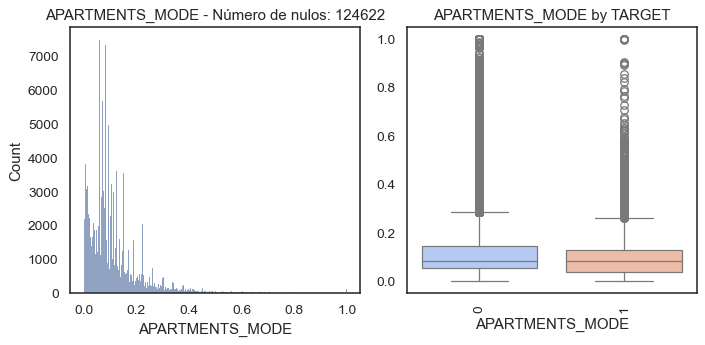

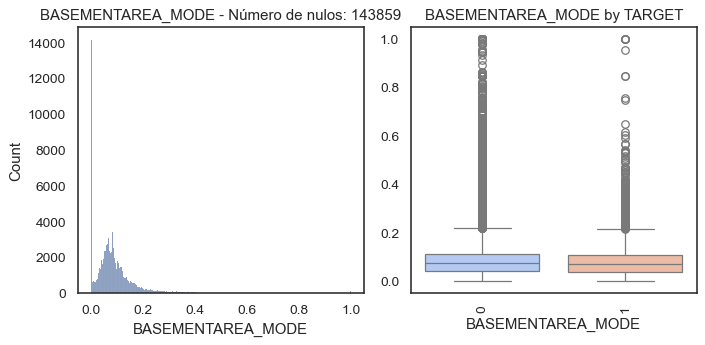

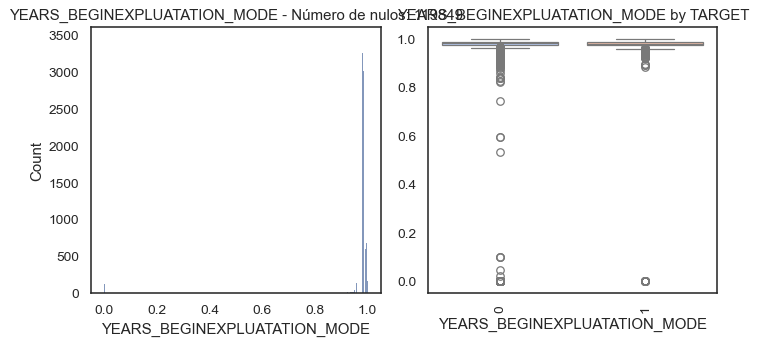

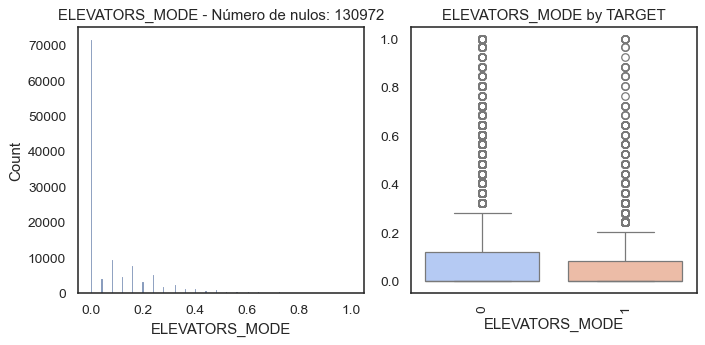

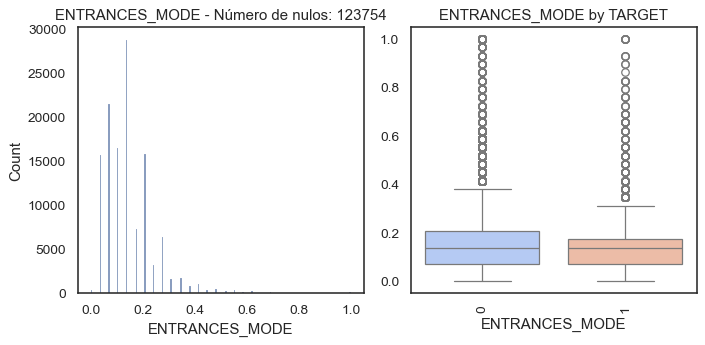

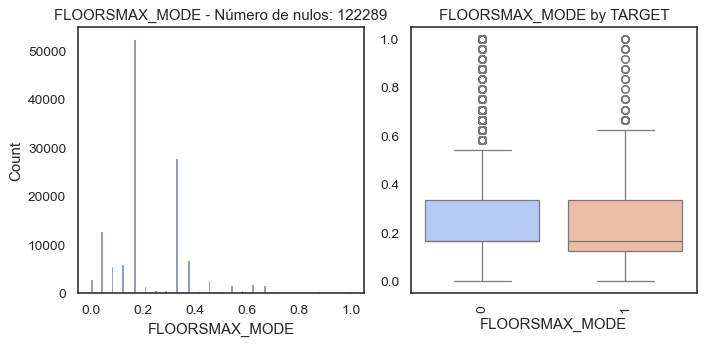

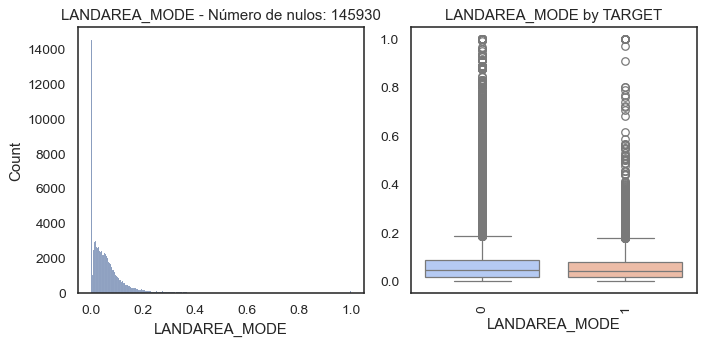

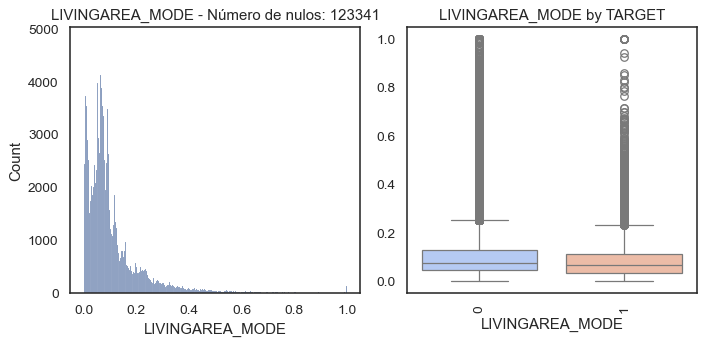

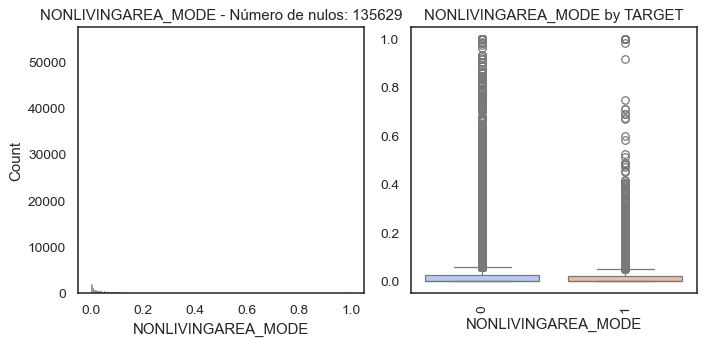

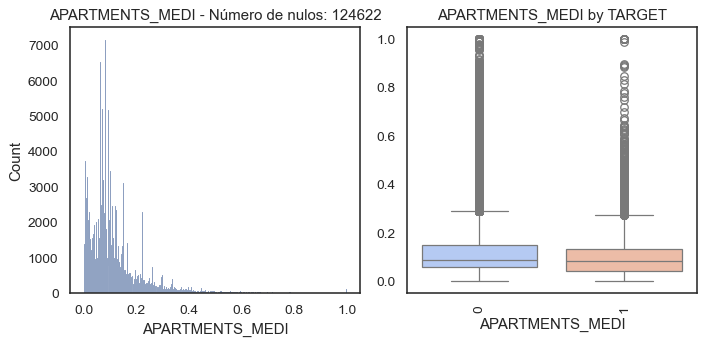

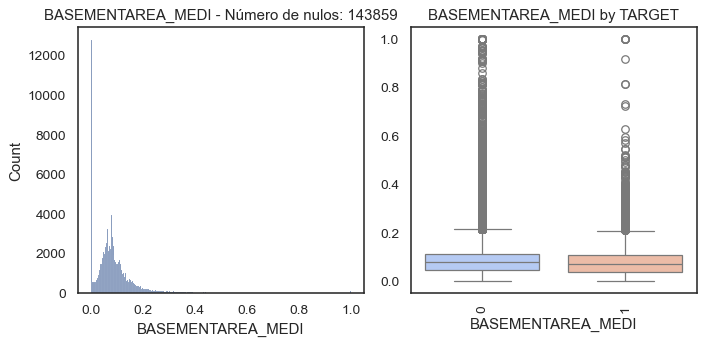

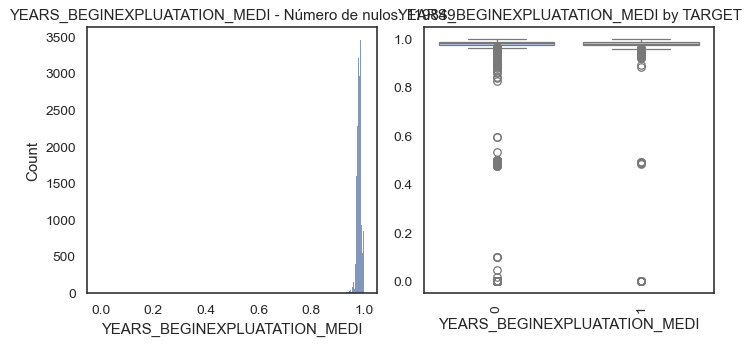

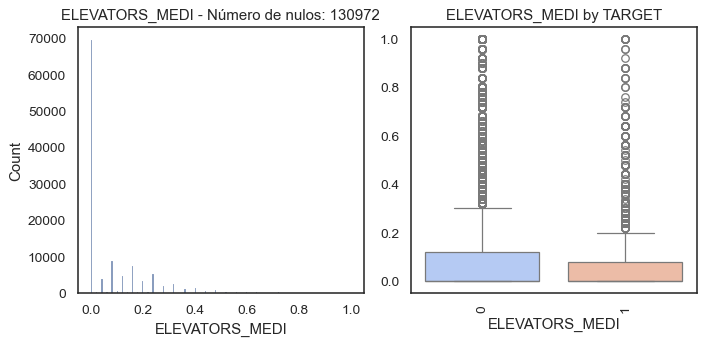

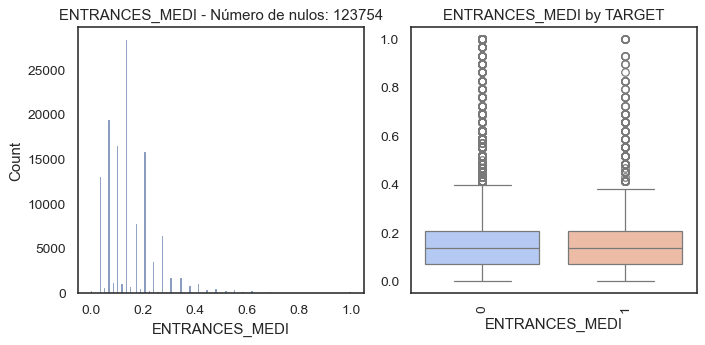

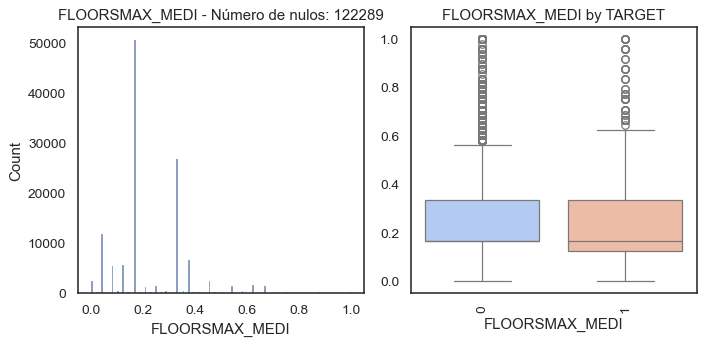

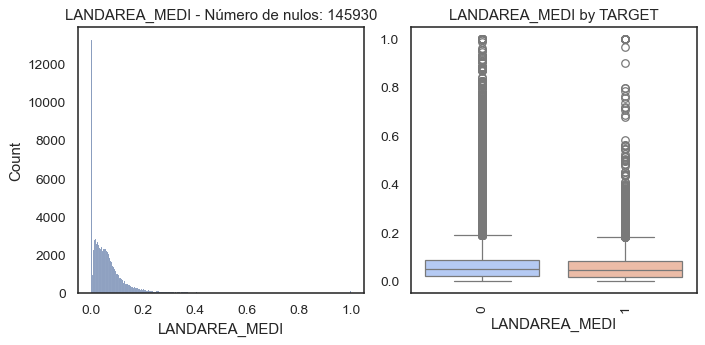

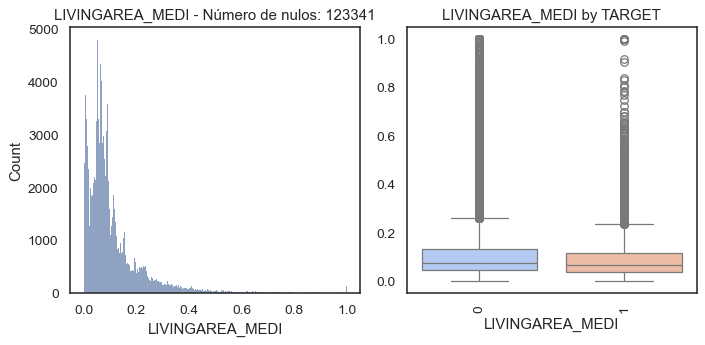

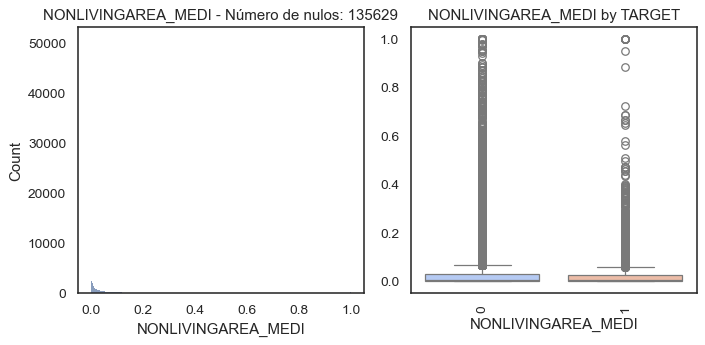

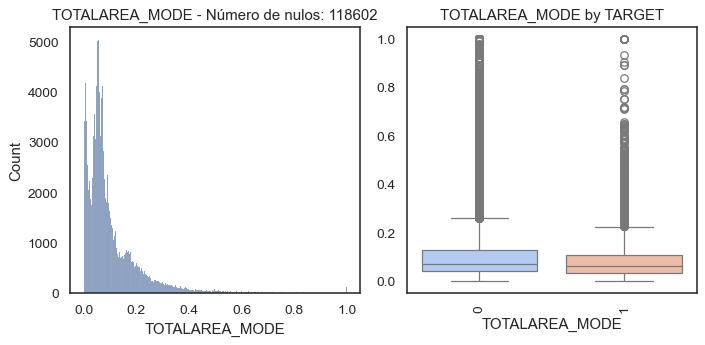

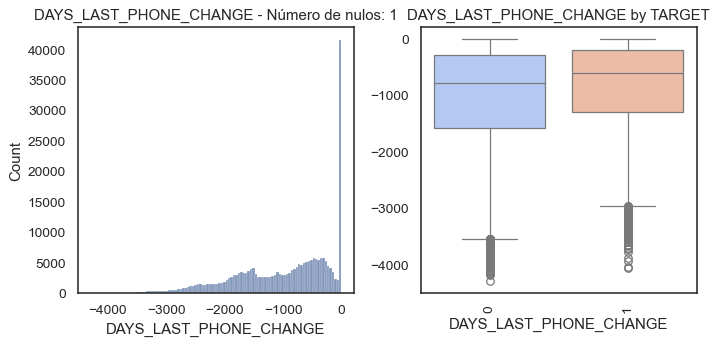

In [ ]:
### Distribuación de las variables respecto al target
for i in columnas_continuas:
    if  i!='TARGET' and i!= 'SK_ID_CURR':
        f.plot_feature(df_loan_train, col_name=i, isContinuous=True, target='TARGET')
    
    plt.show()

### Inferencia


La edad del cliente, medida a través de la variable DAYS_BIRTH, se muestra como un factor altamente relevante en la capacidad de pago. Los datos reflejan que los clientes con dificultades para devolver el préstamo tienen una media de edad significativamente menor, con rangos intercuartílicos también más bajos. Esto sugiere que la juventud podría estar asociada con un mayor riesgo de impago.

En cuanto a DAYS_LAST_PHONE_CHANGE, existe una relación notable: aquellos clientes que han cambiado su número de teléfono móvil más recientemente tienen más probabilidades de presentar dificultades de pago. Esto podría interpretarse como un indicio de inestabilidad o cambios recientes en su situación personal.

Por otro lado, en la variable DAYS_ID_PUBLISH, los clientes que han actualizado su documento de identidad en fechas más cercanas a la solicitud del préstamo parecen tener una mayor capacidad de pago. Este comportamiento podría asociarse con un perfil más organizado o con menos riesgo financiero.

Finalmente, las puntuaciones más bajas en las variables externas EXT_SOURCE_* están claramente correlacionadas con un mayor riesgo de impago. Estas puntuaciones, provenientes de fuentes externas, reflejan de forma consistente la probabilidad de dificultades financieras, reafirmando su importancia en el análisis.

# 2. - Tratamiento variables continuas

In [8]:
## Almacenamos en una lista aquellas variables que son continuas
lista_continuas = [col for col in df_loan_train.columns if col not in lista_categoricas_definitivo]
lista_continuas.remove('SK_ID_CURR') ## elimino el ID 
lista_continuas.remove('TARGET')
df_loan_train[lista_continuas].head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
123961             0          157500.0    265306.5      30136.5   
278364             1          243000.0    787131.0      42066.0   
264997             0          157500.0    508495.5      22527.0   
99398              0          189000.0   1094688.0      39451.5   
65018              0          270000.0    848745.0      46174.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
123961         252000.0                    0.031329      -18978   
278364         679500.0                    0.007274      -13093   
264997         454500.0                    0.003813      -21574   
99398          945000.0                    0.019101      -16646   
65018          675000.0                    0.035792      -19737   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
123961          -2104            -2942.0            -2508          8.0   
278364          -4101            -4684.0            -4656          NaN   
264997         365243            -2556.0            -4958          NaN   
99398           -2019            -2045.0             -191          NaN   
65018           -2994            -2368.0            -3260          1.0   

        CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  \
123961              2.0                        8           NaN      0.491939   
278364              3.0                       13      0.427897      0.585800   
264997              2.0                       14           NaN      0.593599   
99398               2.0                       16           NaN      0.472874   
65018               2.0                       13           NaN      0.360709   

        EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
123961      0.641368          0.0722            0.0000   
278364           NaN          0.0758            0.0698   
264997      0.524496             NaN               NaN   
99398       0.636376          0.0082            0.0230   
65018            NaN             NaN               NaN   

        YEARS_BEGINEXPLUATATION_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
123961                       0.9781            0.0         0.1379   
278364                       0.9876            0.0         0.1379   
264997                          NaN            NaN            NaN   
99398                        0.9737            0.0         0.0345   
65018                           NaN            NaN            NaN   

        FLOORSMAX_AVG  LANDAREA_AVG  LIVINGAREA_AVG  NONLIVINGAREA_AVG  \
123961         0.1667        0.0708          0.0627             0.0000   
278364         0.1667        0.1401          0.0362             0.0000   
264997            NaN           NaN             NaN                NaN   
99398          0.0417        0.0000          0.0076             0.0017   
65018             NaN           NaN             NaN                NaN   

        APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
123961           0.0735             0.0000                        0.9782   
278364           0.0725             0.0633                        0.9876   
264997              NaN                NaN                           NaN   
99398            0.0084             0.0238                        0.9737   
65018               NaN                NaN                           NaN   

        ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  LANDAREA_MODE  \
123961             0.0          0.1379          0.1667         0.0724   
278364             0.0          0.1379          0.1667         0.0532   
264997             NaN             NaN             NaN            NaN   
99398              0.0          0.0345          0.0417         0.0000   
65018              NaN             NaN             NaN            NaN   

        LIVINGAREA_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
123961           0.0654              0.0000           0.0729   
278364           0.0376              0.0000

## 2.1. - Outliers

In [11]:
def get_deviation_of_mean_perc(pd_loan, list_var_continuous, target, multiplier):
    ### La dejo aquí porque me da problemas al pasarla al .py
    """
    Devuelve un DataFrame que muestra el porcentaje de valores que exceden el intervalo de confianza,
    junto con la distribución del target para esos valores.
    
    :param pd_loan: DataFrame con los datos a analizar.
    :param list_var_continuous: Lista de variables continuas a analizar.
    :param target: Variable objetivo para analizar la distribución de categorías.
    :param multiplier: Factor multiplicativo para determinar el rango de confianza (media ± multiplier * std).
    :return: DataFrame con las proporciones del target para los valores fuera del rango de confianza.
    """
    # DataFrame para almacenar los resultados finales
    pd_final = pd.DataFrame()

    # Obtener las categorías únicas del target para usarlas en las columnas
    target_categories = pd_loan[target].unique()

    # Iterar sobre cada variable continua de la lista
    for i in list_var_continuous:
        # Calcular la media y desviación estándar de la variable
        series_mean = pd_loan[i].mean()
        series_std = pd_loan[i].std()

        # Determinar los límites del rango de confianza
        std_amp = multiplier * series_std
        left = series_mean - std_amp  # Límite inferior
        right = series_mean + std_amp  # Límite superior
        size_s = pd_loan[i].size  # Tamaño total de la serie (número de valores [filas])

        # Calcular el porcentaje de valores fuera del rango de confianza
        perc_excess = pd_loan[i][(pd_loan[i] < left) | (pd_loan[i] > right)].size / size_s

        # Si hay valores fuera del rango de confianza, analizar el target
        if perc_excess > 0:
            # Filtrar el target para los valores fuera del rango de confianza
            outliers = pd_loan[target][(pd_loan[i] < left) | (pd_loan[i] > right)]
            
            # Calcular las proporciones de cada categoría del target
            proportions = outliers.value_counts(normalize=True)

            # Crear un DataFrame temporal con estas proporciones
            temp_df = proportions.to_frame().T.reset_index(drop=True)
            
            # Asignar nombres a las columnas basados en las categorías del target
            temp_df.columns = [str(cat) for cat in proportions.index]
            
            # Añadir información adicional al DataFrame temporal
            temp_df['variable'] = i  # Nombre de la variable continua
            temp_df['sum_outlier_values'] = outliers.size  # Total de valores fuera del rango
            temp_df['porcentaje_sum_null_values'] = perc_excess  # Porcentaje de valores fuera del rango

            # Concatenar los resultados de esta variable al DataFrame final
            pd_final = pd.concat([pd_final, temp_df], axis=0).reset_index(drop=True)

    # Si no se encontró ningún valor fuera del rango, mostrar mensaje
    if pd_final.empty:
        print('No existen variables con valores fuera del rango de confianza')
        
    return pd_final.sort_values(by='sum_outlier_values', ascending=False)

In [12]:
df_outliers = get_deviation_of_mean_perc(df_loan_train, lista_continuas, target='TARGET', multiplier=3)
df_outliers

0         1                      variable  sum_outlier_values  \
45  0.924131  0.075869    AMT_REQ_CREDIT_BUREAU_WEEK                6788   
5   0.963018  0.036982    REGION_POPULATION_RELATIVE                6733   
39  0.879490  0.120510      DEF_30_CNT_SOCIAL_CIRCLE                5485   
38  0.910334  0.089666      OBS_30_CNT_SOCIAL_CIRCLE                4974   
40  0.910259  0.089741      OBS_60_CNT_SOCIAL_CIRCLE                4825   
0   0.900917  0.099083                  CNT_CHILDREN                3381   
4   0.963229  0.036771               AMT_GOODS_PRICE                3345   
8   0.902677  0.097323               CNT_FAM_MEMBERS                3175   
41  0.874206  0.125794      DEF_60_CNT_SOCIAL_CIRCLE                3148   
22  0.951959  0.048041                ELEVATORS_MODE                2706   
7   0.916760  0.083240                   OWN_CAR_AGE                2691   
26  0.948785  0.051215               LIVINGAREA_MODE                2675   
37  0.957958  0.042042                TOTALAREA_MODE                2664   
48  0.905967  0.094033    AMT_REQ_CREDIT_BUREAU_YEAR                2648   
46  0.947148  0.052852     AMT_REQ_CREDIT_BUREAU_MON                2630   
2   0.961923  0.038077                    AMT_CREDIT                2600   
35  0.952713  0.047287               LIVINGAREA_MEDI                2580   
17  0.951525  0.048475                LIVINGAREA_AVG                2558   
28  0.951907  0.048093               APARTMENTS_MEDI                2412   
19  0.951066  0.048934               APARTMENTS_MODE                2391   
10  0.951919  0.048081                APARTMENTS_AVG                2371   
3   0.967220  0.032780                   AMT_ANNUITY                2349   
33  0.962929  0.037071                FLOORSMAX_MEDI                2158   
23  0.943155  0.056845                ENTRANCES_MODE                2111   
24  0.963960  0.036040                FLOORSMAX_MODE                2081   
15  0.962136  0.037864                 FLOORSMAX_AVG                2060   
13  0.957825  0.042175                 ELEVATORS_AVG                1968   
31  0.958610  0.041390                ELEVATORS_MEDI                1957   
27  0.946903  0.053097            NONLIVINGAREA_MODE                1921   
36  0.946270  0.053730            NONLIVINGAREA_MEDI                1917   
18  0.945975  0.054025             NONLIVINGAREA_AVG                1888   
47  0.911749  0.088251     AMT_REQ_CREDIT_BUREAU_QRT                1847   
32  0.939326  0.060674                ENTRANCES_MEDI                1780   
14  0.939052  0.060948                 ENTRANCES_AVG                1772   
34  0.936084  0.063916                 LANDAREA_MEDI                1721   
25  0.934311  0.065689                 LANDAREA_MODE                1705   
16  0.934234  0.065766                  LANDAREA_AVG                1703   
20  0.945345  0.054655             BASEMENTAREA_MODE                1665   
29  0.948669  0.051331             BASEMENTAREA_MEDI                1578   
11  0.949109  0.050891              BASEMENTAREA_AVG                1572   
43  0.920792  0.079208    AMT_REQ_CREDIT_BUREAU_HOUR                1313   
44  0.911017  0.088983     AMT_REQ_CREDIT_BUREAU_DAY                1180   
6   0.965574  0.034426             DAYS_REGISTRATION                 610   
12  0.913201  0.086799   YEARS_BEGINEXPLUATATION_AVG                 553   
21  0.911275  0.088725  YEARS_BEGINEXPLUATATION_MODE                 541   
42  0.952471  0.047529        DAYS_LAST_PHONE_CHANGE                 526   
30  0.909266  0.090734  YEARS_BEGINEXPLUATATION_MEDI                 518   
9   0.896484  0.103516       HOUR_APPR_PROCESS_START                 512   
1   0.951923  0.048077              AMT_INCOME_TOTAL                 208   

    porcentaje_sum_null_values  
45                    0.027593  
5                     0.027369  
39                    0.022296  
38                    0.020219  
40                    0.019613  
0           

Implicaciones
1. Relación Entre Outliers y Categorías del Objetivo
    - Si los valores extremos tienen proporciones significativamente diferentes de las categorías del objetivo, podrían ser informativos para el modelo. Por ejemplo, variables como DEF_30_CNT_SOCIAL_CIRCLE tienen un 11.5% de 1 en los outliers, lo que podría ser relevante.
    - Por otro lado, si las proporciones son similares a las del conjunto completo, los outliers podrían ser simplemente ruido.

2. Impacto de los Outliers en el Modelo
    - Las variables con altos porcentajes de outliers pueden sesgar el modelo si no se tratan adecuadamente.
    - Por ejemplo, en variables como AMT_REQ_CREDIT_BUREAU_WEEK, los outliers representan un 2.7% de los datos, lo que podría influir desproporcionadamente en modelos sensibles a valores extremos (e.g., regresión lineal).

Opciones de tratamiento de outliers:

1. Winsorización: Limitar los valores extremos al percentil más cercano (e.g., 1% y 99%).
Útil cuando los outliers no aportan información adicional pero podrían distorsionar el modelo.

2. Eliminación de Outliers: Eliminar filas que contienen outliers si representan errores de medición o no aportan valor.
Usar criterios como el rango intercuartílico (IQR) para definir qué valores eliminar.

3. Imputación de Valores Extremos: Sustituir los valores extremos por la mediana, el valor más cercano al límite del rango o incluso predicciones basadas en otras variables.
4. Dejar los Outliers Intactos: Si los outliers aportan información relevante para el modelo (e.g., diferencian claramente entre categorías del objetivo), podrían mantenerse, pero asegurando que el modelo sea robusto (e.g., árboles de decisión, Random Forest).

Conclusión:

Por el momento no voy a realizar un tratamiento de los outliers, ya que parece no son muchos y además no tienen un impacto significativo. Además, como todavía no se ha determinado el tipo de modelo que se va a utilizar en este proyecto, no se si va a ser un modelo que funcionaría mejor con los outliers. 
En caso de que más tarde hubiera que corregir algunos de ellos seguramente autlizaré el método winsorize, permitiendome reemplazarlos por los valores más cercanos dentro del rango que determine, por ejemplo podría ser el percentil 1.

In [13]:
## Aunque he decidido no tratar los outliers en general, he incorporado un criterio específico para identificar 
## un subconjunto de ellos que podrían ser relevantes para mejorar la detección de clientes no solventes.
## Para ello, defino un **umbral de mejora** basado en el porcentaje inicial de casos positivos ajustado 
## en un 25%. Este criterio asegura que solo se consideren aquellos outliers que superen este umbral, ya 
## que podrían aportar información valiosa para el modelo.

## Este enfoque permite mantener los outliers que podrían ser útiles, mientras que los restantes no se tratan por 
## ahora. Cabe destacar que, dado que representan una proporción pequeña de los datos, existe el riesgo de que 
## estos valores contribuyan al overfitting en ciertos modelos. En ese caso, se podría revisar este criterio y 
## ajustar o eliminar los outliers problemáticos.

umbral_mejora_outliers = 0.0807 *1.25
df_outliers_mantener = df_outliers[df_outliers['1'] > umbral_mejora_outliers]
outliers_mantenidos = df_outliers_mantener['variable'].tolist()

df_outliers_mantener

0         1                  variable  sum_outlier_values  \
39  0.879490  0.120510  DEF_30_CNT_SOCIAL_CIRCLE                5485   
41  0.874206  0.125794  DEF_60_CNT_SOCIAL_CIRCLE                3148   
9   0.896484  0.103516   HOUR_APPR_PROCESS_START                 512   

    porcentaje_sum_null_values  
39                    0.022296  
41                    0.012796  
9                     0.002081

# 2.2. - Valores faltantenes (NaN)

## 2.2.1. - Análisis

In [18]:
def get_percent_null_values_target(pd_loan, list_var_continuous, target):

    pd_final = pd.DataFrame()
    for i in list_var_continuous:
        if pd_loan[i].isnull().sum()>0:
            pd_concat_percent = pd.DataFrame(pd_loan[target][pd_loan[i].isnull()]\
                                            .value_counts(normalize=True)).T
            pd_concat_percent['variable'] = i
            pd_concat_percent['sum_null_values'] = pd_loan[i].isnull().sum()
            pd_concat_percent['porcentaje_sum_null_values'] = pd_loan[i].isnull().sum()/pd_loan.shape[0]
            pd_final = pd.concat([pd_final, pd_concat_percent], axis=0).reset_index(drop=True)
            
    if pd_final.empty:
        print('No existen variables con valores nulos')
        
    return pd_final.sort_values(by='sum_null_values', ascending=False)

In [19]:
get_percent_null_values_target(df_loan_train,lista_continuas,'TARGET')

TARGET         0                      variable  sum_null_values  \
2       0.914729                   OWN_CAR_AGE           162518   
13      0.911598                  LANDAREA_AVG           145823   
31      0.911598                 LANDAREA_MEDI           145823   
22      0.911598                 LANDAREA_MODE           145823   
17      0.910656             BASEMENTAREA_MODE           143748   
8       0.910656              BASEMENTAREA_AVG           143748   
26      0.910656             BASEMENTAREA_MEDI           143748   
4       0.914352                  EXT_SOURCE_1           138708   
24      0.909419            NONLIVINGAREA_MODE           135547   
33      0.909419            NONLIVINGAREA_MEDI           135547   
15      0.909419             NONLIVINGAREA_AVG           135547   
10      0.908799                 ELEVATORS_AVG           131019   
28      0.908799                ELEVATORS_MEDI           131019   
19      0.908799                ELEVATORS_MODE           131019   
16      0.908276               APARTMENTS_MODE           124700   
25      0.908276               APARTMENTS_MEDI           124700   
7       0.908276                APARTMENTS_AVG           124700   
29      0.908010                ENTRANCES_MEDI           123731   
20      0.908010                ENTRANCES_MODE           123731   
11      0.908010                 ENTRANCES_AVG           123731   
32      0.908414               LIVINGAREA_MEDI           123414   
14      0.908414                LIVINGAREA_AVG           123414   
23      0.908414               LIVINGAREA_MODE           123414   
21      0.907847                FLOORSMAX_MODE           122308   
12      0.907847                 FLOORSMAX_AVG           122308   
30      0.907847                FLOORSMAX_MEDI           122308   
27      0.907703  YEARS_BEGINEXPLUATATION_MEDI           119917   
18      0.907703  YEARS_BEGINEXPLUATATION_MODE           119917   
9       0.907703   YEARS_BEGINEXPLUATATION_AVG           119917   
34      0.907463                TOTALAREA_MODE           118645   
6       0.906314                  EXT_SOURCE_3            49015   
42      0.896509    AMT_REQ_CREDIT_BUREAU_WEEK            33317   
40      0.896509    AMT_REQ_CREDIT_BUREAU_HOUR            33317   
43      0.896509     AMT_REQ_CREDIT_BUREAU_MON            33317   
44      0.896509     AMT_REQ_CREDIT_BUREAU_QRT            33317   
41      0.896509     AMT_REQ_CREDIT_BUREAU_DAY            33317   
45      0.896509    AMT_REQ_CREDIT_BUREAU_YEAR            33317   
37      0.969400      OBS_60_CNT_SOCIAL_CIRCLE              817   
38      0.969400      DEF_60_CNT_SOCIAL_CIRCLE              817   
36      0.969400      DEF_30_CNT_SOCIAL_CIRCLE              817   
35      0.969400      OBS_30_CNT_SOCIAL_CIRCLE              817   
5       0.915414                  EXT_SOURCE_2              532   
1       0.926087               AMT_GOODS_PRICE              230   
0       1.000000                   AMT_ANNUITY               10   
39      1.000000        DAYS_LAST_PHONE_CHANGE                1   
3       1.000000               CNT_FAM_MEMBERS                1   

TARGET  porcentaje_sum_null_values         1  
2                         0.660621  0.085271  
13                        0.592757  0.088402  
31                        0.592757  0.088402  
22                        0.592757  0.088402  
17                        0.584322  0.089344  
8                         0.584322  0.089344  
26                        0.584322  0.089344  
4                         0.563835  0.085648  
24                        0.550986  0.090581  
33                        0.550986  0.090581  
15                        0.550986  0.090581  
10                        0.532580  0.091201  
28                        0.532580  0.091201  
19                        0.532580  0.091201  
16                        0.506894  0.091724  
25                        0.506894  0.091724  
7                         0.506894  0.091724  
29  

### Inferencia de la tabla

Lo primero quiero aclarar que viendo la variable 'OWN_CAR_AGE', con un 66% de faltantes y un impacto en la predicción de la variable objetivo no muy alto, es candidata a ser eliminada. Pero la voy a dejar porque veo probable que exista algún tipo de relación entre la solvencia y esta variable. Ya sea porque una persona con un coche de 30 años es probable que no tenga poder adquisitivo para tener un buen sustituto. O por el otro lado, una persona que acaba de comprarse un coche habrá tenido que realizar una gran inversión de captial.


#### Selección de variables para KNN 

La imputación por KNN (K-Nearest Neighbors) consiste en rellenar valores faltantes en un conjunto de datos utilizando los valores de los registros más similares, según una métrica de distancia (como la distancia euclidiana). El algoritmo identifica los 
𝑘 vecinos más cercanos para cada registro con valores faltantes, basándose en las características disponibles, y utiliza sus valores (generalmente mediante un promedio ponderado, una moda, o una mediana) para imputar los datos faltantes. Este método es especialmente útil cuando las variables están correlacionadas y los patrones entre los datos permiten inferencias significativas, pero requiere escalamiento previo de los datos y puede ser computacionalmente costoso en conjuntos de datos grandes.

¿Qué considerar para usar KNN en imputación?
1. Tamaño y proporción de valores faltantes:
    - Problema: Si una columna tiene una alta proporción de valores faltantes (por ejemplo, más del 50%), KNN podría no ser efectivo, ya que no habría suficientes datos completos para inferir patrones.
En este caso:
Algunas variables, como OWN_CAR_AGE (66% faltantes) o LANDAREA_AVG (59%), tienen una proporción de valores faltantes muy alta. KNN no sería la mejor opción para estas variables.
Variables como EXT_SOURCE_3 (19%) o AMT_REQ_CREDIT_BUREAU_WEEK (13%) tienen una proporción manejable, por lo que KNN podría ser adecuado.

2. Relación entre las variables:
    - Ventaja del KNN: Puede aprovechar patrones complejos en los datos para imputar valores faltantes basándose en la similitud con otros registros.
    - Problema: Si las variables no están correlacionadas entre sí o con las otras variables del dataset, KNN podría generar imputaciones poco fiables.
3. Escalamiento de los datos:
    - Importante: Antes de aplicar KNN, las variables deben estar normalizadas o estandarizadas, ya que KNN se basa en la distancia entre puntos.

4. Tamaño del dataset:
    - Problema: KNN es computacionalmente costoso para datasets grandes, ya que calcula distancias para cada registro faltante. Si el dataset es muy grande, podrías considerar una muestra.

Basándome en esto, voy a aplicar este método solo a aquellas variables que me están ayudanod a predecir considerablente la variable objetivo. 'AMT_REQ_CREDIT_BUREAU_*' son las variables que mejor cumplen estos requisitos. 'EXT_SOURCE_*' podrían considerase también pero como no parecen tener un impacto significativo en la predicción y 'EXT_SOURCE_1' tiene un 59% de nulos, no voy a aplicar este método.

In [20]:
# Filtrar las columnas que comienzan con un prefijo específico
lista_KNN = [col for col in df_loan_train.columns if col.startswith("AMT_REQ_CREDIT_BUREAU_")]

# Mostrar las columnas filtradas
print(lista_KNN)

['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


### Análisis visual

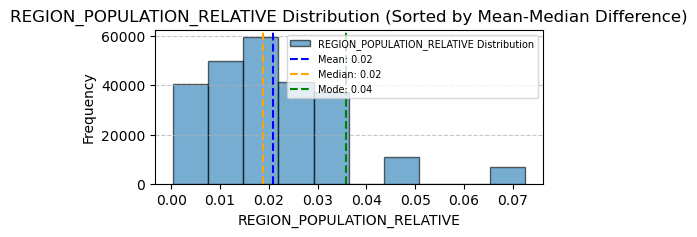

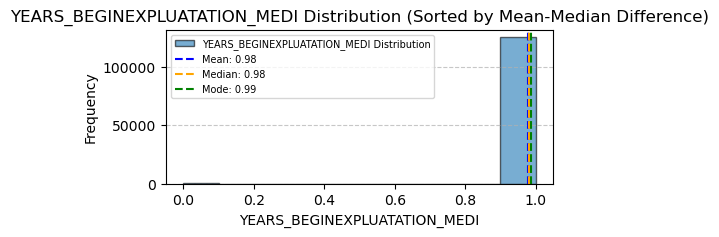

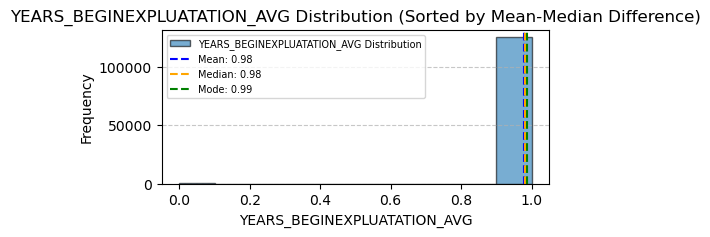

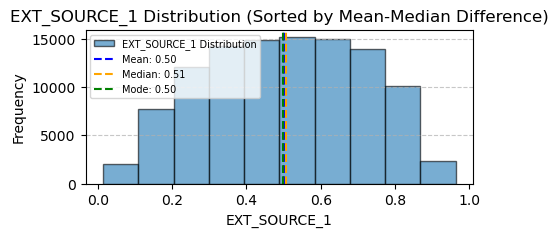

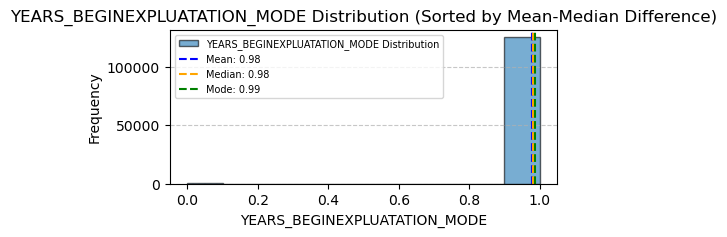

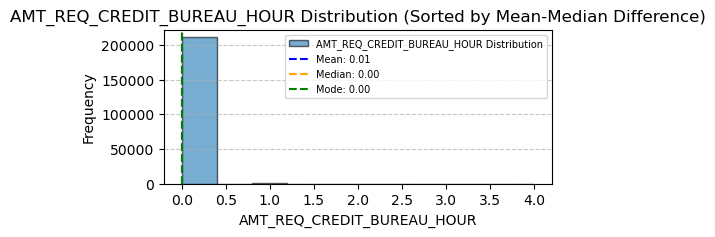

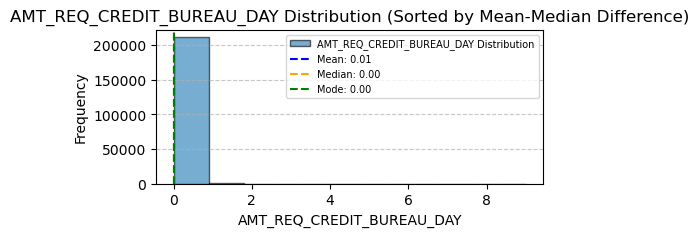

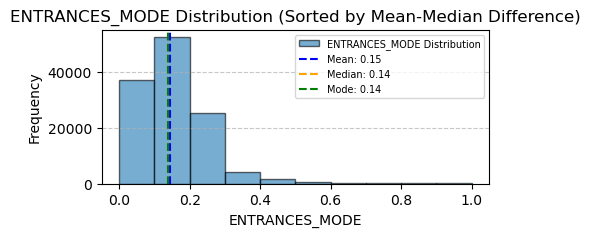

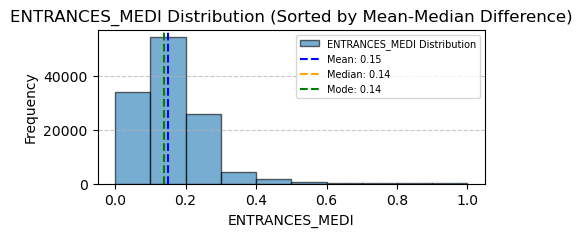

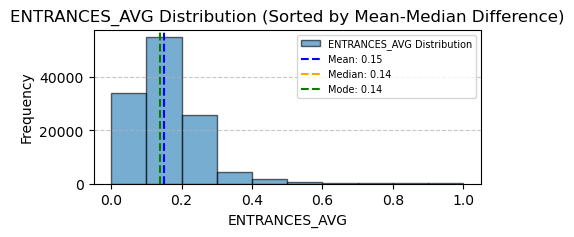

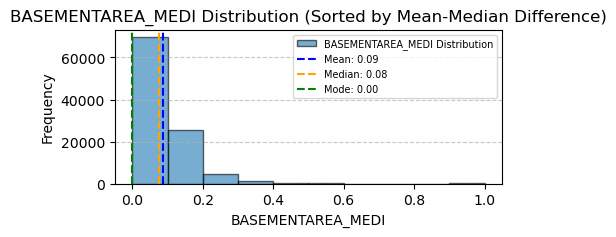

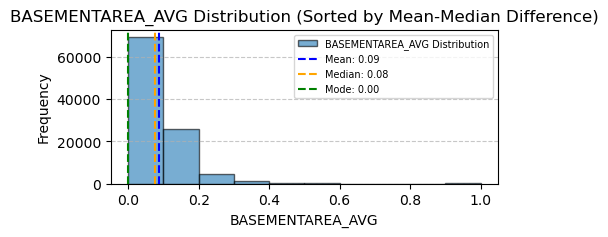

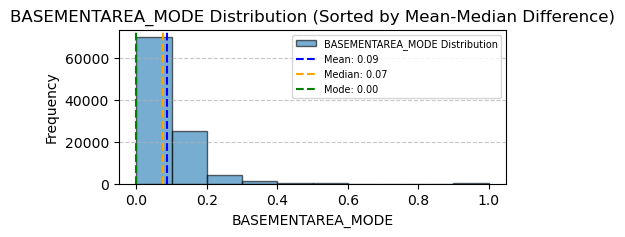

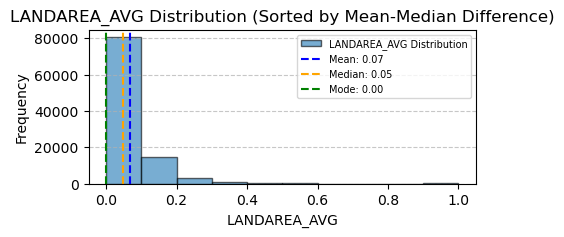

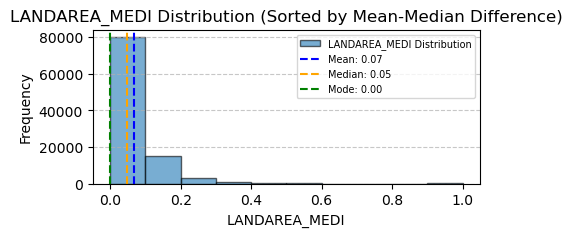

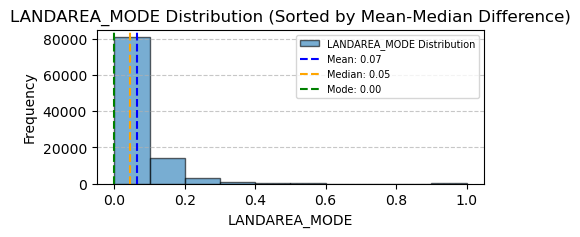

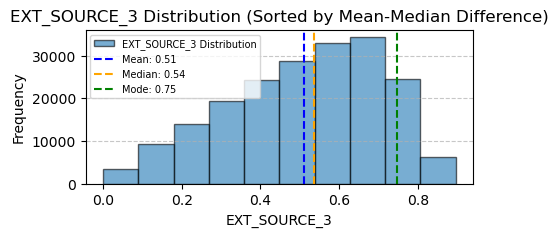

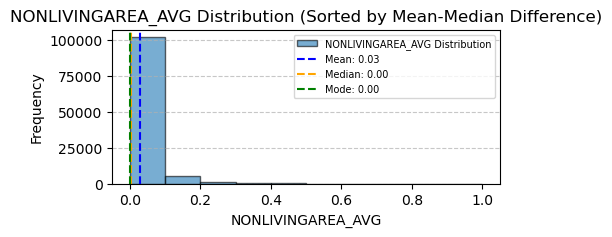

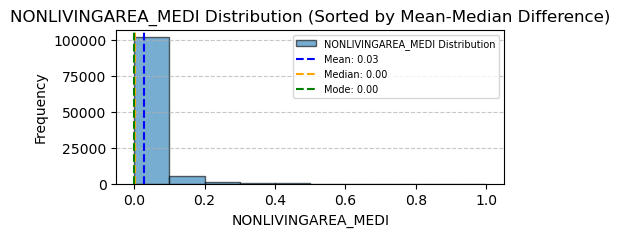

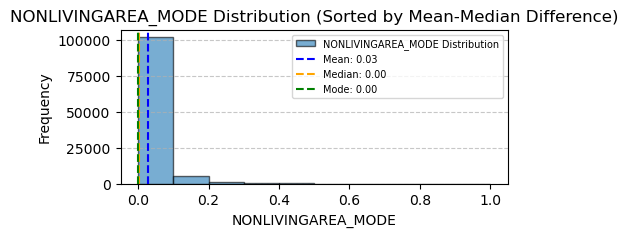

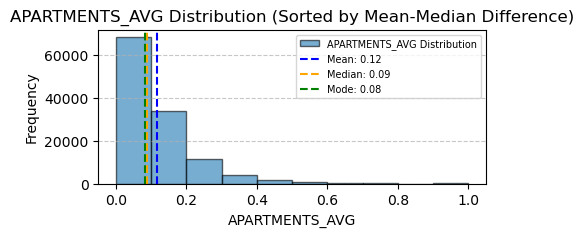

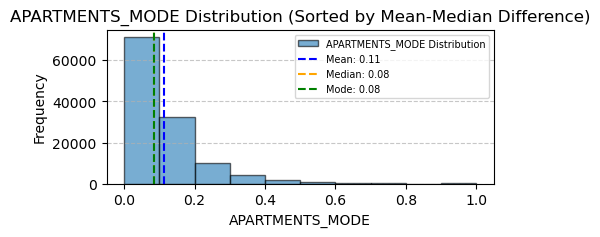

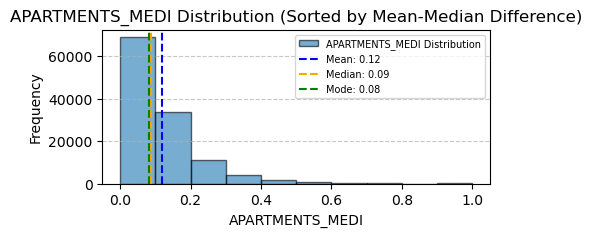

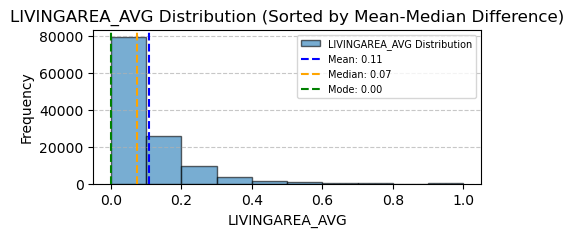

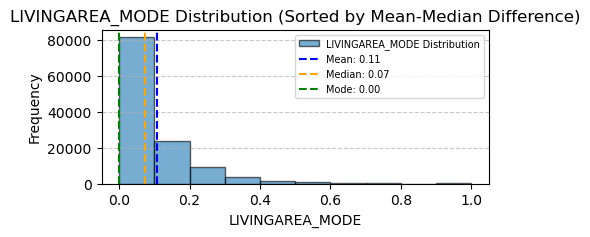

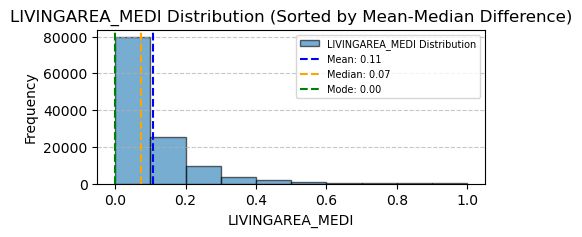

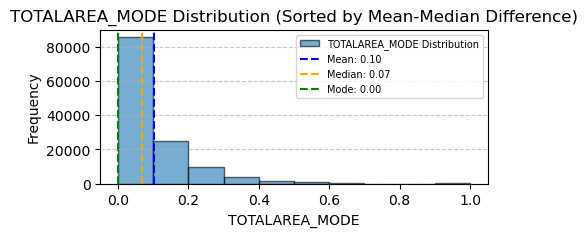

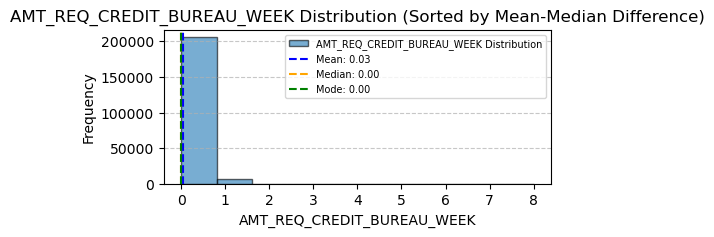

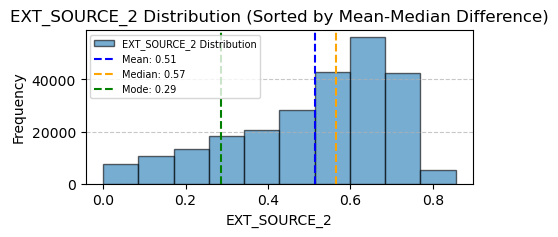

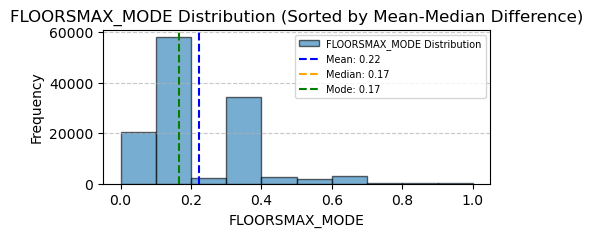

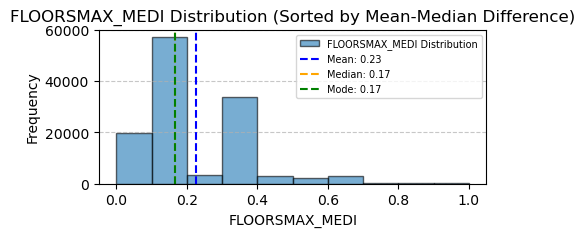

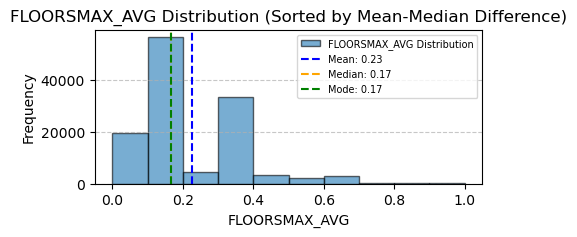

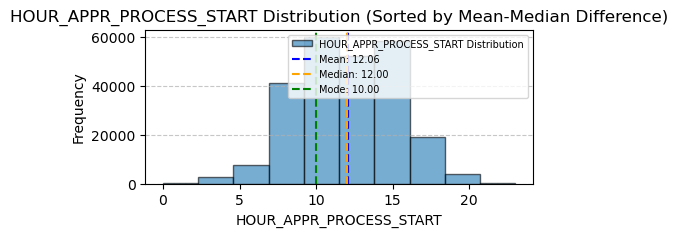

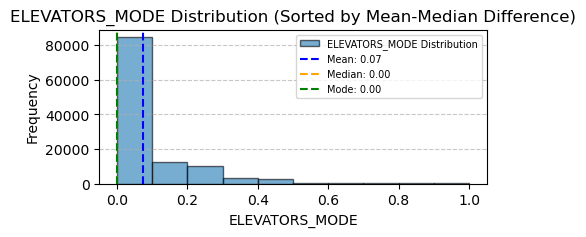

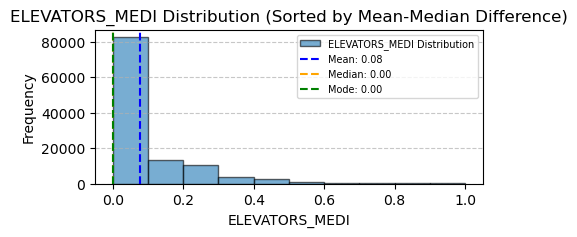

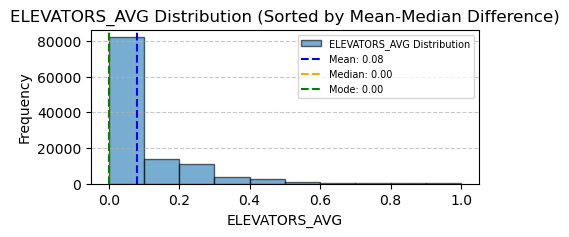

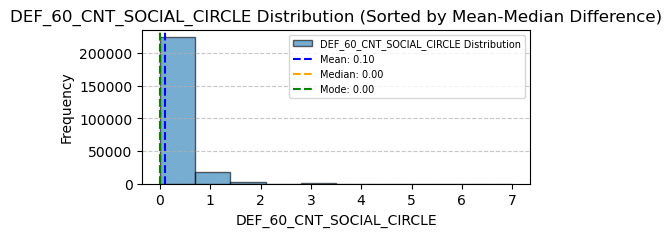

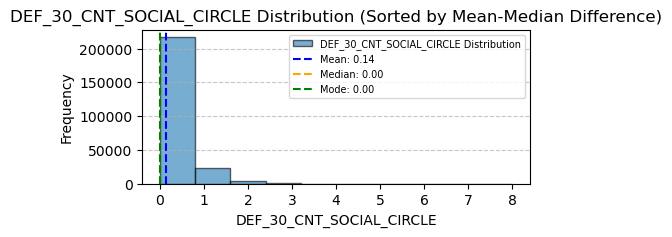

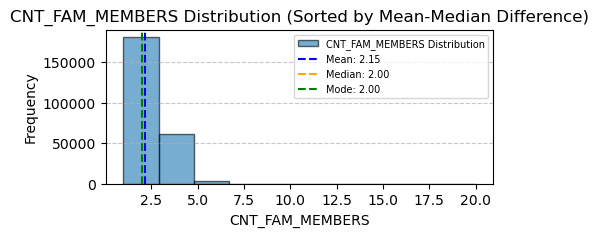

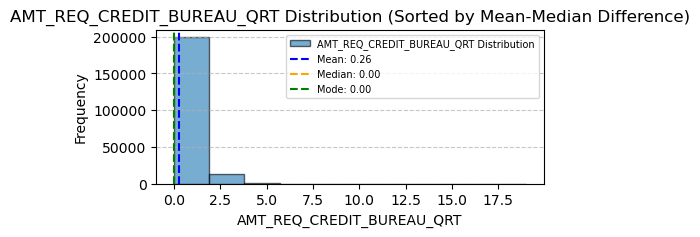

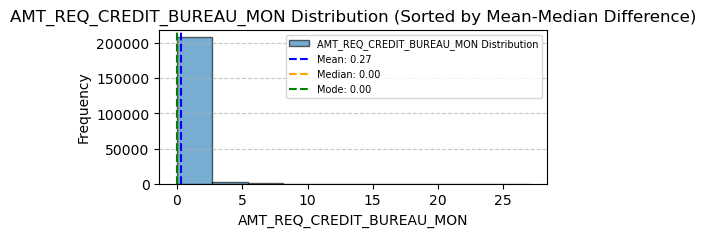

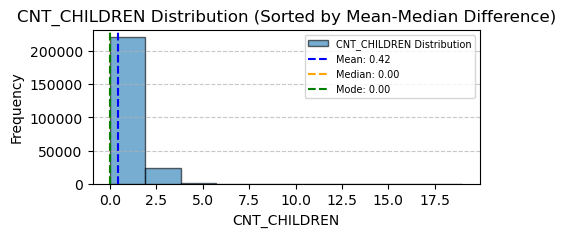

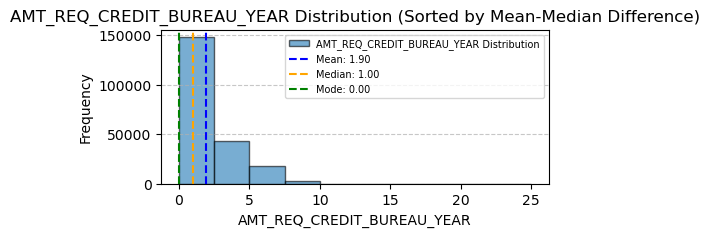

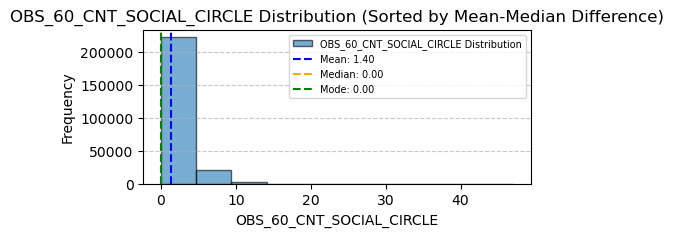

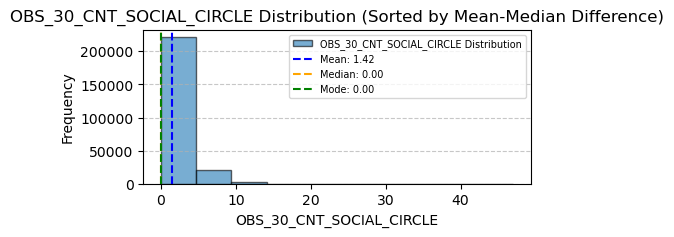

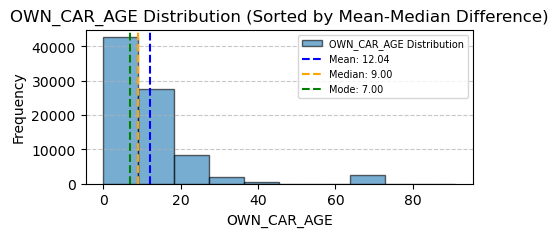

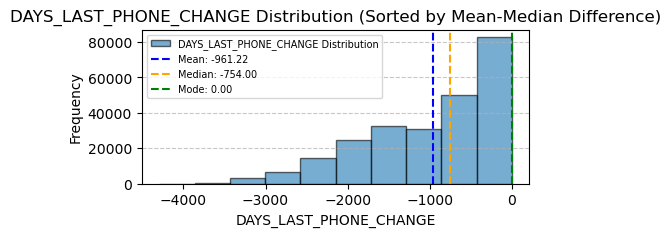

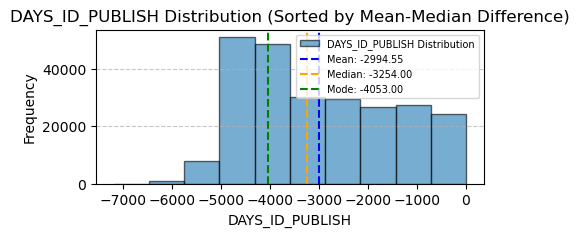

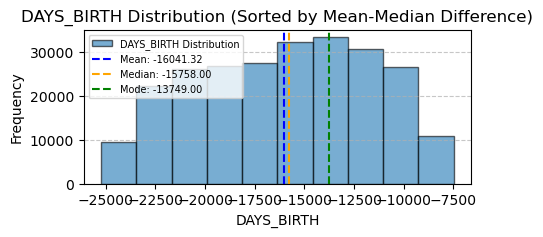

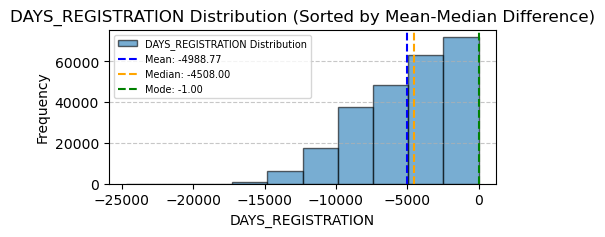

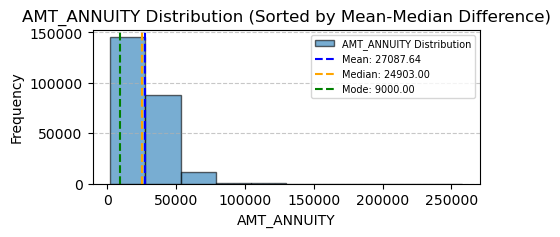

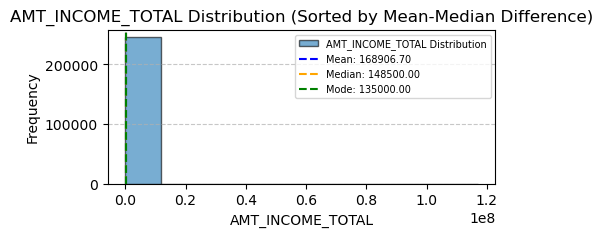

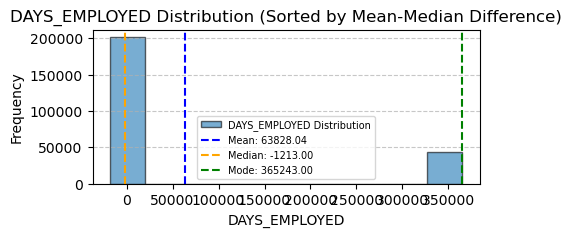

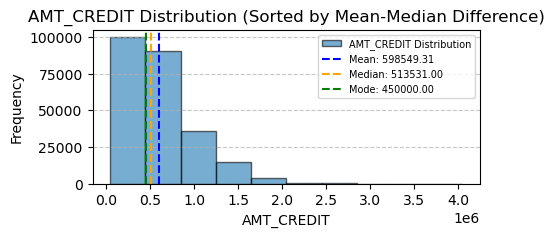

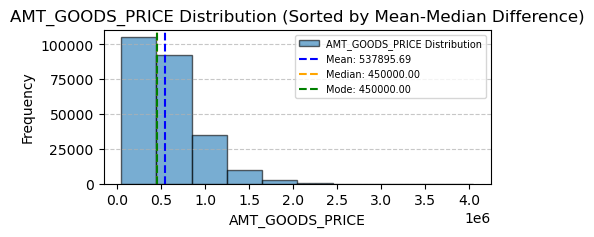

({'REGION_POPULATION_RELATIVE': {'mean': 0.02085631909531397,
   'median': 0.01885,
   'mode': 0.035792},
  'YEARS_BEGINEXPLUATATION_MEDI': {'mean': 0.9776991945477077,
   'median': 0.9816,
   'mode': 0.9871},
  'YEARS_BEGINEXPLUATATION_AVG': {'mean': 0.9776933514440951,
   'median': 0.9816,
   'mode': 0.9871},
  'EXT_SOURCE_1': {'mean': 0.502323018270659,
   'median': 0.5063105808442032,
   'mode': 0.4990017461254777},
  'YEARS_BEGINEXPLUATATION_MODE': {'mean': 0.9770493470593844,
   'median': 0.9816,
   'mode': 0.9871},
  'AMT_REQ_CREDIT_BUREAU_HOUR': {'mean': 0.006437576651802286,
   'median': 0.0,
   'mode': 0.0},
  'AMT_REQ_CREDIT_BUREAU_DAY': {'mean': 0.006945064446250934,
   'median': 0.0,
   'mode': 0.0},
  'ENTRANCES_MODE': {'mean': 0.14532999492194537,
   'median': 0.1379,
   'mode': 0.1379},
  'ENTRANCES_MEDI': {'mean': 0.14937817337461295,
   'median': 0.1379,
   'mode': 0.1379},
  'ENTRANCES_AVG': {'mean': 0.14988131767326818,
   'median': 0.1379,
   'mode': 0.1379},
  'BA

In [ ]:
f.analyze_and_sort_columns(df_loan_train, lista_continuas)

## 2.2.2. - Tratamiento valores faltantes

Criterios principales para imputación:
1. Imputar con la media:
Cuándo usarlo: La distribución es aproximadamente simétrica.
La media representa bien el centro de la distribución sin ser influenciada por outliers extremos.
Ventaja: Es simple y rápida.
Desventaja: En distribuciones sesgadas, puede distorsionar los datos.

2. Imputar con la mediana:
Cuándo usarlo: La distribución tiene un sesgo (asimetría) o hay valores atípicos (outliers) que afectan la media. La mediana es más robusta frente a valores extremos.
    - Ventaja: Mantiene la estructura central de datos sesgados.
    - Desventaja: No captura toda la variabilidad de la distribución.

3. Imputar con la moda: 
Cuándo usarlo: La variable es categórica o tiene una distribución con valores altamente repetidos. Es útil en datos discretos o donde un valor domina la distribución.
    - Ventaja: Mantiene el valor más frecuente en los datos.
    - Desventaja: No es adecuada para variables continuas.

4. Métodos avanzados:
    - Interpolación: Útil para datos secuenciales o temporales.
    - Imputación basada en predicción: Usar modelos como regresión, árboles de decisión, o k-NN para predecir valores faltantes.
    - MICE (Multiple Imputation by Chained Equations): Genera múltiples imputaciones y promedia los resultados.
    - KNN Imputation: Usa los valores más cercanos (según distancia euclidiana) para completar los faltantes.

In [ ]:
resultados, lista_media, lista_mediana = f.crear_lista_tratamiento(df_loan_train, lista_continuas, 25)
lista_mediana


['CNT_CHILDREN',
 'OWN_CAR_AGE',
 'APARTMENTS_AVG',
 'ELEVATORS_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'ELEVATORS_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'ELEVATORS_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
lista_mediana= [elem for elem in lista_mediana if elem not in lista_KNN]

## 2.2.3. - Imputación de los valores

In [ ]:
from sklearn.impute import SimpleImputer

# Imputación por media, aquí lo voy a hacer de forma básica, usando un loop en vez de utilizar los métoodos
# específicos de sicit-learn, para ir viendo el funcionamiento 
for i in lista_media:
    media = df_loan_train[i].mean()  # Calcular la media de la columna en el DataFrame de entrenamiento
    df_loan_train[i] = df_loan_train[i].fillna(media)  # Rellenar NaN en el DataFrame de entrenamiento
    df_loan_test[i] = df_loan_test[i].fillna(media)    # Rellenar NaN en el DataFrame de prueba


# Crear un imputador con la estrategia de la media
imputer = SimpleImputer(strategy='median')

# Con fit calculamos el valor del imputer y luego lo aplicamos, hay que hacerlo con el conjunto de 
# entrenamiento 
df_loan_train[lista_mediana] = imputer.fit_transform(df_loan_train[lista_mediana])
df_loan_test[lista_mediana] = imputer.transform(df_loan_test[lista_mediana])


In [ ]:
### Imputación con KNN 
X_train_knn = df_loan_train[lista_KNN]
X_test_knn = df_loan_test[lista_KNN]

# Reducir el tamaño del conjunto para KNN -- sin esta parte me era imposible realizar el proceso 
X_train_sample = X_train_knn.sample(frac=0.1, random_state=42)  # Usar solo el 10% de las filas
imputer_knn = KNNImputer(n_neighbors=2, weights="uniform")
model = imputer_knn.fit(X_train_sample)

# imputación de los valores en los conjuntos de datos
X_train_knn_imputed = imputer_knn.transform(X_train_knn)
X_test_knn_imputed = imputer_knn.transform(X_test_knn)

In [142]:
# Crear DataFrames con las variables imputadas por KNN
df_knn_train = pd.DataFrame(X_train_knn_imputed, 
                            columns=[f"{col}_input" for col in lista_KNN], 
                            index=df_loan_train.index)
df_knn_test = pd.DataFrame(X_test_knn_imputed, 
                           columns=[f"{col}_input" for col in lista_KNN], 
                           index=df_loan_test.index)

# Concatenar resultados con los DataFrames originales y eliminar las variables originales imputadas por KNN
df_loan_imputed_train = pd.concat([df_loan_train, df_knn_train], axis=1).drop(lista_KNN, axis=1)
df_loan_imputed_test = pd.concat([df_loan_test, df_knn_test], axis=1).drop(lista_KNN, axis=1)
df_loan_imputed_train

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
210811      344298         Cash loans           F            N   
215268      349444         Cash loans           F            N   
289724      435652         Cash loans           F            Y   
139834      262147    Revolving loans           F            N   
101209      217506         Cash loans           M            Y   
...            ...                ...         ...          ...   
4539        105309         Cash loans           F            Y   
250023      389286         Cash loans           F            N   
91654       206439         Cash loans           M            Y   
2832        103306         Cash loans           M            Y   
107997      225288         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
210811               Y           0.0          135000.0    448056.0   
215268               N           2.0          112500.0   1082214.0   
289724               Y           0.0          112500.0    509922.0   
139834               N           1.0          270000.0    495000.0   
101209               Y           0.0          157500.0    450000.0   
...                ...           ...               ...         ...   
4539                 Y           2.0          135000.0    450000.0   
250023               N           0.0          225000.0    528637.5   
91654                Y           1.0           90000.0    207000.0   
2832                 N           0.0          121500.0    490536.0   
107997               N           0.0          117000.0    284400.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
210811      17019.0         315000.0          Family               Working   
215268      31770.0         945000.0   Unaccompanied         State servant   
289724      28602.0         472500.0          Family               Working   
139834      24750.0         495000.0   Unaccompanied         State servant   
101209      20979.0         450000.0   Unaccompanied             Pensioner   
...             ...              ...             ...                   ...   
4539        30204.0         450000.0   Unaccompanied               Working   
250023      50323.5         508500.0   Unaccompanied         State servant   
91654       13356.0         207000.0          Family               Working   
2832        23989.5         405000.0   Unaccompanied  Commercial associate   
107997      14854.5         225000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
210811               Higher education     Civil marriage    House / apartment   
215268  Secondary / secondary special     Civil marriage  Municipal apartment   
289724               Higher education     Civil marriage    House / apartment   
139834  Secondary / secondary special            Married    House / apartment   
101209               Higher education            Married    House / apartment   
...                               ...                ...                  ...   
4539                 Higher education            Married    House / apartment   
250023  Secondary / secondary special            Married    House / apartment   
91654                Higher education            Married    House / apartment   
2832    Secondary / secondary special            Married     Office apartment   
107997  Secondary / secondary special              Widow    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
210811                    0.006852      -13709           -984   
215268                    0.046220      -14449           -550   
289724                    0.019689      -20083          -1823   
139834                    0.030755      -14797          -2568   
101209                    0.035792      -13337         365243   
...                            ...         ...            ...   
4539     

In [ ]:
lista_knn_imputed = [col for col in df_loan_imputed_train.columns if col.startswith("AMT_REQ_CREDIT_BUREAU_")]
df_loan_imputed_train[lista_knn_imputed].head()

AMT_REQ_CREDIT_BUREAU_HOUR_input  AMT_REQ_CREDIT_BUREAU_DAY_input  \
210811                               0.0                              0.0   
215268                               0.0                              0.0   
289724                               0.0                              0.0   
139834                               0.0                              0.0   
101209                               0.0                              0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK_input  AMT_REQ_CREDIT_BUREAU_MON_input  \
210811                               0.0                              0.0   
215268                               0.0                              0.0   
289724                               0.0                              0.0   
139834                               0.0                              0.0   
101209                               0.0                              0.0   

        AMT_REQ_CREDIT_BUREAU_QRT_input  AMT_REQ_CREDIT_BUREAU_YEAR_input  
210811                              0.0                               6.0  
215268                              0.0                               1.0  
289724                              1.0                               0.0  
139834                              0.0                               5.0  
101209                              0.0                               0.0

In [ ]:
## Actualizo la información para mis nuevas variables y mi nuevo 'df_loan_imputed_train/test'
lista_continuas_imputed = [col for col in lista_continuas if col not in lista_KNN]
lista_continuas_imputed.extend(lista_knn_imputed)
lista_continuas_imputed

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_S

## 2.2.3. - Correlaciones variables continuas

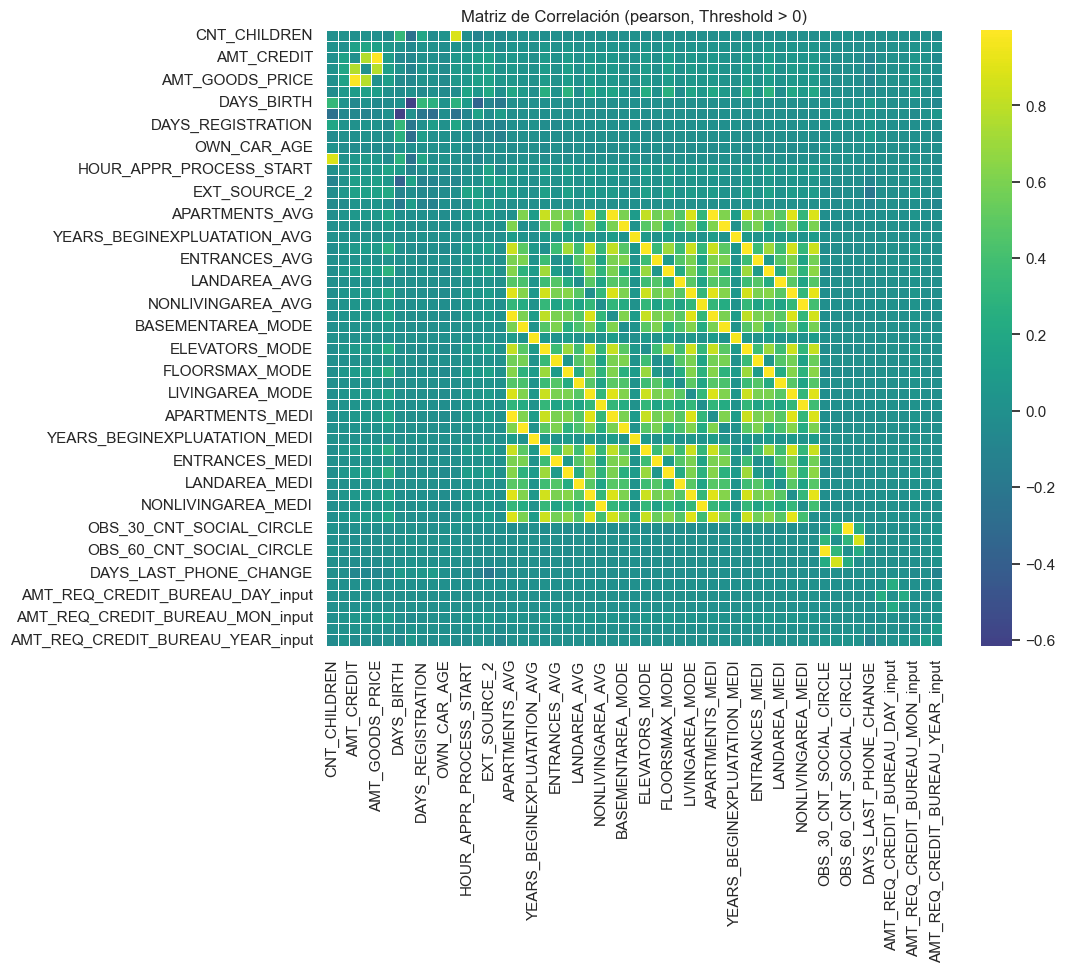

0

In [ ]:
f.get_corr_matrix(dataset = df_loan_imputed_train[lista_continuas_imputed], 
                metodo='pearson', size_figure=[10,8])

In [159]:
corr = df_loan_imputed_train[lista_continuas_imputed].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.7]

level_0                       level_1  correlation
2574      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998373
2166                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997373
2110                ENTRANCES_MEDI                 ENTRANCES_AVG     0.996907
2054                ELEVATORS_MEDI                 ELEVATORS_AVG     0.996667
2278               LIVINGAREA_MEDI                LIVINGAREA_AVG     0.995822
1886               APARTMENTS_MEDI                APARTMENTS_AVG     0.995176
1942             BASEMENTAREA_MEDI              BASEMENTAREA_AVG     0.994554
1998  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.994193
2222                 LANDAREA_MEDI                  LANDAREA_AVG     0.992023
2334            NONLIVINGAREA_MEDI             NONLIVINGAREA_AVG     0.991620
2175                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.989004
1671                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.986747
222                AMT_GOODS_PRICE                    AMT_CREDIT     0.986533
2063                ELEVATORS_MEDI                ELEVATORS_MODE     0.985299
1559                ELEVATORS_MODE                 ELEVATORS_AVG     0.981921
2231                 LANDAREA_MEDI                 LANDAREA_MODE     0.981172
2119                ENTRANCES_MEDI                ENTRANCES_MODE     0.980383
1951             BASEMENTAREA_MEDI             BASEMENTAREA_MODE     0.978280
1895               APARTMENTS_MEDI               APARTMENTS_MODE     0.977846
1615                ENTRANCES_MODE                 ENTRANCES_AVG     0.977490
2343            NONLIVINGAREA_MEDI            NONLIVINGAREA_MODE     0.977373
2287               LIVINGAREA_MEDI               LIVINGAREA_MODE     0.975537
1727                 LANDAREA_MODE                  LANDAREA_AVG     0.974688
1447             BASEMENTAREA_MODE              BASEMENTAREA_AVG     0.974060
1391               APARTMENTS_MODE                APARTMENTS_AVG     0.973960
1503  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.973437
1783               LIVINGAREA_MODE                LIVINGAREA_AVG     0.973151
1839            NONLIVINGAREA_MODE             NONLIVINGAREA_AVG     0.968643
2007  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.967349
2388                TOTALAREA_MODE                LIVINGAREA_AVG     0.917154
2406                TOTALAREA_MODE               LIVINGAREA_MEDI     0.911799
2289               LIVINGAREA_MEDI               APARTMENTS_MEDI     0.900744
1281                LIVINGAREA_AVG                APARTMENTS_AVG     0.898324
1893               APARTMENTS_MEDI                LIVINGAREA_AVG     0.897674
2271               LIVINGAREA_MEDI                APARTMENTS_AVG     0.897042
1785               LIVINGAREA_MODE               APARTMENTS_MODE     0.894311
2397                TOTALAREA_MODE               LIVINGAREA_MODE     0.892162
2381                TOTALAREA_MODE                APARTMENTS_AVG     0.883630
1902               APARTMENTS_MEDI               LIVINGAREA_MODE     0.880945
2280               LIVINGAREA_MEDI               APARTMENTS_MODE     0.880024
605                CNT_FAM_MEMBERS                  CNT_CHILDREN     0.879071
2399                TOTALAREA_MODE               APARTMENTS_MEDI     0.878652
1776               LIVINGAREA_MODE                APARTMENTS_AVG     0.878406
1398               APARTMENTS_MODE                LIVINGAREA_AVG     0.876870
2630      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE     0.858956
2390                TOTALAREA_MODE               APARTMENTS_MODE     0.855897
2292               LIVINGAREA_MEDI                ELEVATORS_MEDI     0.849934
1284                LIVINGAREA_AVG                 ELEVATORS_AVG     0.848812
2058                ELEVATORS_MEDI                LIVINGAREA_AVG     0.847491
2274               LIVINGAREA_MEDI                 ELEVATORS_AVG     0.847192
2283               LIVINGAREA_MEDI               

En el DataFrame presentado, se observa una fuerte correlación entre variables que comparten sufijos como _MODE, _AVG y _MEDI. Estas columnas representan diferentes formas de agregación o medición de características similares. Por ejemplo, variables como OBS_60_CNT_SOCIAL_CIRCLE y OBS_30_CNT_SOCIAL_CIRCLE o FLOORSMAX_MEDI y FLOORSMAX_AVG presentan correlaciones extremadamente altas, cercanas al 1.

Este nivel de redundancia dificulta la extracción de conclusiones claras, ya que las variables no aportan información verdaderamente independiente al análisis. Cuando múltiples variables contienen datos casi idénticos, es posible que los modelos predictivos o estadísticos asignen pesos similares a estas columnas, lo que puede llevar a problemas como multicolinealidad o sobreajuste.

Además, trabajar con estas variables sin una adecuada agrupación o reducción dimensional podría complicar la interpretación de los resultados y generar modelos más complejos de lo necesario. Por lo tanto, es esencial agrupar estas variables según sus sufijos (_MODE, _AVG, _MEDI) o seleccionar una representación representativa de cada grupo, para simplificar el análisis y evitar redundancias innecesarias.

In [160]:
# Paso 1: Listar las columnas que no terminan en _MODE, _AVG o _MEDI
suffixes = ['_MODE', '_AVG', '_MEDI']
variables_resto = [col for col in df_loan_imputed_train[lista_continuas_imputed].columns if not any(col.endswith(suffix) for suffix in suffixes)]
print(variables_resto)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR_input', 'AMT_REQ_CREDIT_BUREAU_DAY_input', 'AMT_REQ_CREDIT_BUREAU_WEEK_input', 'AMT_REQ_CREDIT_BUREAU_MON_input', 'AMT_REQ_CREDIT_BUREAU_QRT_input', 'AMT_REQ_CREDIT_BUREAU_YEAR_input']


In [161]:
# Paso 2: Crear DataFrames separados para cada sufijo
mode_columns = [col for col in df_loan_imputed_train[lista_continuas_imputed].columns if col.endswith('_MODE')]
avg_columns = [col for col in df_loan_imputed_train[lista_continuas_imputed].columns if col.endswith('_AVG')]
medi_columns = [col for col in df_loan_imputed_train[lista_continuas_imputed].columns if col.endswith('_MEDI')]

# Crear un diccionario para almacenar los DataFrames con nombres específicos
dfs = {}

# Lista de sufijos y nombres correspondientes
df_names = ['df_mode', 'df_avg', 'df_medi']

# Crear los DataFrames combinando las variables restantes con las de cada sufijo
for name, suffix_columns in zip(df_names, [mode_columns, avg_columns, medi_columns]):
    varsi = variables_resto + suffix_columns  # Combinar las columnas sin sufijo con las del sufijo actual
    dfs[name] = df_loan_imputed_train[varsi]  # Guardar el DataFrame con el nombre específico

# Asignar los DataFrames a variables específicas
df_mode = dfs['df_mode']
df_avg = dfs['df_avg']
df_medi = dfs['df_medi']

# Verificar los DataFrames creados
print("DataFrame con '_MODE':", df_mode.head())
print("DataFrame con '_AVG':", df_avg.head())
print("DataFrame con '_MEDI':", df_medi.head())


DataFrame con '_MODE':         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
210811           0.0          135000.0    448056.0      17019.0   
215268           2.0          112500.0   1082214.0      31770.0   
289724           0.0          112500.0    509922.0      28602.0   
139834           1.0          270000.0    495000.0      24750.0   
101209           0.0          157500.0    450000.0      20979.0   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
210811         315000.0                    0.006852      -13709   
215268         945000.0                    0.046220      -14449   
289724         472500.0                    0.019689      -20083   
139834         495000.0                    0.030755      -14797   
101209         450000.0                    0.035792      -13337   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
210811           -984            -4529.0             -546          9.0   
215268           -550  

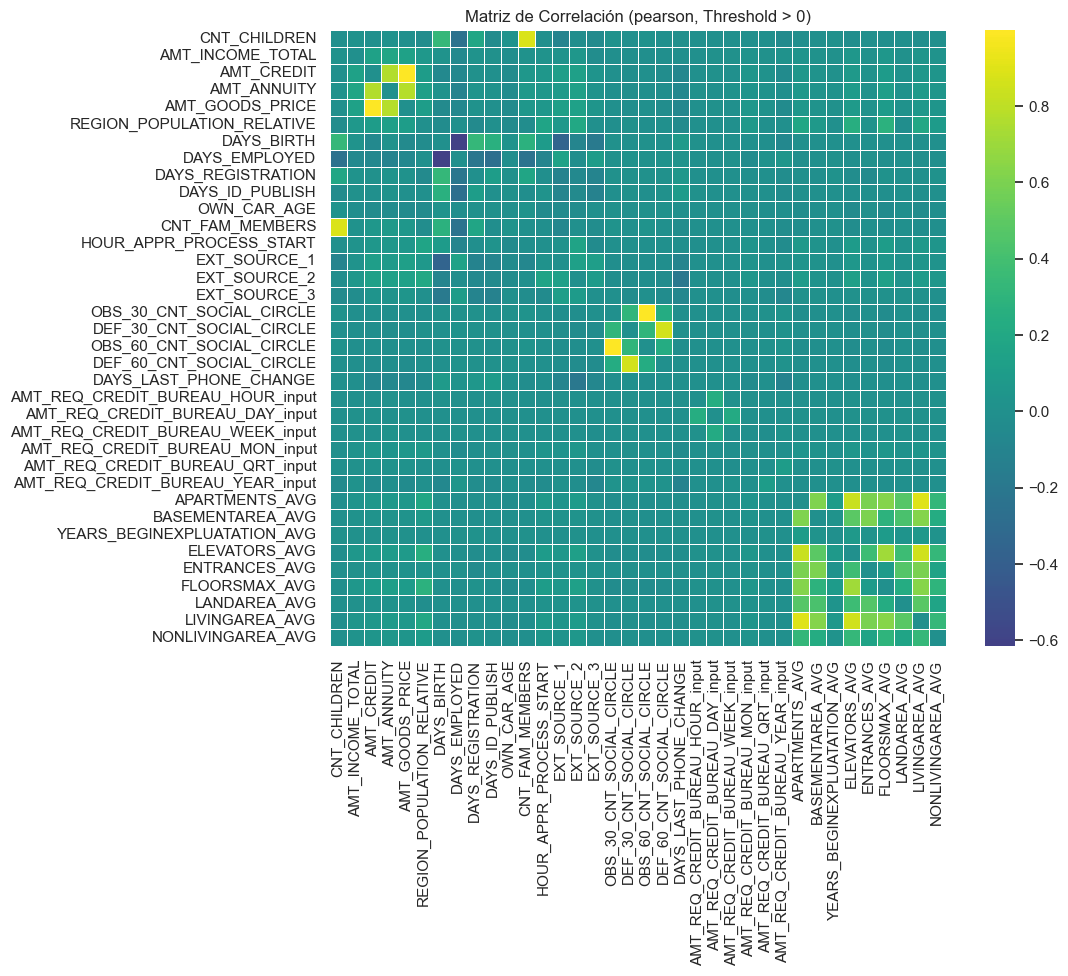

0

In [ ]:
f.get_corr_matrix(dataset = df_avg, 
                metodo='pearson', size_figure=[10,8])

In [162]:
corr = df_avg.corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.6]

level_0                   level_1  correlation
664   OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998373
146            AMT_GOODS_PRICE                AMT_CREDIT     0.986533
1251            LIVINGAREA_AVG            APARTMENTS_AVG     0.898324
396            CNT_FAM_MEMBERS              CNT_CHILDREN     0.879071
701   DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.858956
1254            LIVINGAREA_AVG             ELEVATORS_AVG     0.848812
1107             ELEVATORS_AVG            APARTMENTS_AVG     0.825427
147            AMT_GOODS_PRICE               AMT_ANNUITY     0.775188
110                AMT_ANNUITY                AMT_CREDIT     0.770607
1182             FLOORSMAX_AVG             ELEVATORS_AVG     0.709197
1256            LIVINGAREA_AVG             FLOORSMAX_AVG     0.638486
1179             FLOORSMAX_AVG            APARTMENTS_AVG     0.630465
1252            LIVINGAREA_AVG          BASEMENTAREA_AVG     0.622070
258              DAYS_EMPLOYED                DAYS_BIRTH     0.615200
1035          BASEMENTAREA_AVG            APARTMENTS_AVG     0.609837
1144             ENTRANCES_AVG          BASEMENTAREA_AVG     0.601880

###  Implicaciones para el Análisis:

Las variables con correlaciones extremadamente altas (por encima de 0.9) probablemente estén duplicando información, lo que puede generar problemas de multicolinealidad en los modelos predictivos. Esto podría afectar negativamente la estabilidad de los coeficientes estimados y la interpretabilidad del modelo.

En general, estas correlaciones reflejan relaciones esperadas, como las características del edificio (por ejemplo, número de ascensores, área habitable y número de apartamentos), la conexión entre la antigüedad laboral y la edad del cliente, o las observaciones relacionadas con el círculo social de los clientes. Sin embargo, la alta colinealidad entre estas variables indica que podrían estar aportando información redundante.

A medida que avancemos en las siguientes etapas del proyecto, será fundamental evaluar cuidadosamente la relevancia de estas variables y considerar la eliminación de algunas de ellas para mitigar la colinealidad y optimizar el desempeño del modelo. Esto podría implicar el uso de técnicas como la selección de características o la reducción de dimensionalidad.

# 3. - Tratamiento variables Categóricas

## 3.1. - Análisis

In [175]:
print(lista_categoricas_definitivo)

['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'FLAG_WORK_PHO

In [206]:
df_categoricas_missing = (df_loan_imputed_train[lista_categoricas_definitivo].isnull().sum().to_frame('Nulas')
                          .loc[lambda x: x['Nulas'] != 0].reset_index(names='Variables'))
df_categoricas_missing['porcentaje'] = df_categoricas_missing['Nulas'] / df_loan_imputed_train.shape[0]
lista_categoricas_missing = df_categoricas_missing['Variables'].tolist()
df_categoricas_missing

Variables   Nulas  porcentaje
0   WALLSMATERIAL_MODE  125144    0.508699
1       HOUSETYPE_MODE  123509    0.502053
2  EMERGENCYSTATE_MODE  116713    0.474428
3      OCCUPATION_TYPE   77263    0.314067
4      NAME_TYPE_SUITE    1047    0.004256

In [202]:
for i in lista_categoricas_missing:
    print(df_loan_imputed_train[i].value_counts())



WALLSMATERIAL_MODE
Panel           52905
Stone, brick    51721
Block            7424
Wooden           4250
Mixed            1839
Monolithic       1416
Others           1309
Name: count, dtype: int64
HOUSETYPE_MODE
block of flats      120345
specific housing      1191
terraced house         963
Name: count, dtype: int64
EMERGENCYSTATE_MODE
No     127427
Yes      1868
Name: count, dtype: int64
OCCUPATION_TYPE
Laborers                 44250
Sales staff              25623
Core staff               21901
Managers                 17060
Drivers                  14873
High skill tech staff     9173
Accountants               7767
Medicine staff            6798
Security staff            5403
Cooking staff             4791
Cleaning staff            3709
Private service staff     2107
Low-skill Laborers        1691
Waiters/barmen staff      1072
Secretaries               1040
Realty agents              600
HR staff                   458
IT staff                   429
Name: count, dtype: int64
NAME_

**Formas de imputar los valores faltantes con variables categóricas**

1. Imputar con una nueva clase: "sin valor".

Usar una nueva clase, como "sin valor", es ideal cuando los valores faltantes pueden tener un significado implícito o cuando representan una proporción significativa de los datos. Esto permite diferenciar claramente los valores nulos de las categorías existentes, conservando su potencial relevancia en el análisis o modelado. Además, evita distorsionar la distribución original de la variable, especialmente en casos donde las categorías están balanceadas. Sin embargo, este enfoque puede introducir una categoría artificial que no siempre sea representativa, lo que podría generar ruido en el modelo si los valores faltantes no tienen un significado claro.

2. Imputar con la moda.

La moda es adecuada cuando los valores faltantes no tienen un significado especial y se deben a errores aleatorios en la recopilación de datos. Este método es simple, computacionalmente eficiente y mantiene la consistencia con las categorías existentes, especialmente si la moda ya domina la distribución. Es ideal cuando la proporción de valores nulos es baja, ya que evita añadir categorías innecesarias. Sin embargo, imputar con la moda puede sesgar los datos hacia la categoría más frecuente, lo que podría reducir la diversidad de la variable y enmascarar posibles patrones.


**Conclusión:**

Ya que no parece que en ningún caso los valores faltantes estén representando algún valor, y no tengo información como para determinarlo, voy a concluir que los valores faltantes no tienen un significado. 

Para sustituirlos me voy a basar principalme en la cantidad de valores faltantes, voy imputar los faltantes con: 'sin_valor', en casi todos los casos ya que la cantidad de faltantes es muy elevada y sustituir por la moda podría llevar a alterar demasiado la distribución.

El único caso en el que voy a sustituir por la moda va a ser con la variable 'NAME_TYPE_SUITE' ya que aquí los valores faltantes representan menos de un 1% y considero que es mejor mantener la variable limpia.



## 3.2. - Imputación de NaN en variables categóricas

In [207]:
# Eliminar 'NAME_TYPE_SUITE' de la lista de variables categóricas con valores faltantes
lista_categoricas_missing.remove('NAME_TYPE_SUITE')

# Imputar con 'sin_valor' en el conjunto de entrenamiento y prueba
for col in lista_categoricas_missing:
    df_loan_imputed_train[col] = df_loan_imputed_train[col].fillna('sin_valor')
    df_loan_imputed_test[col] = df_loan_imputed_test[col].fillna('sin_valor')

# Imputar con la moda en 'NAME_TYPE_SUITE' en ambos conjuntos
moda_name_type_suite = df_loan_imputed_train['NAME_TYPE_SUITE'].mode()[0]
df_loan_imputed_train['NAME_TYPE_SUITE'] = df_loan_imputed_train['NAME_TYPE_SUITE'].fillna(moda_name_type_suite)
df_loan_imputed_test['NAME_TYPE_SUITE'] = df_loan_imputed_test['NAME_TYPE_SUITE'].fillna(moda_name_type_suite)


In [212]:
print(df_loan_imputed_train.isnull().sum())

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                         0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

## 3.3. - Correlaciones de las variables categóricas

In [218]:
lista_categoricas_definitivo.append('TARGET')

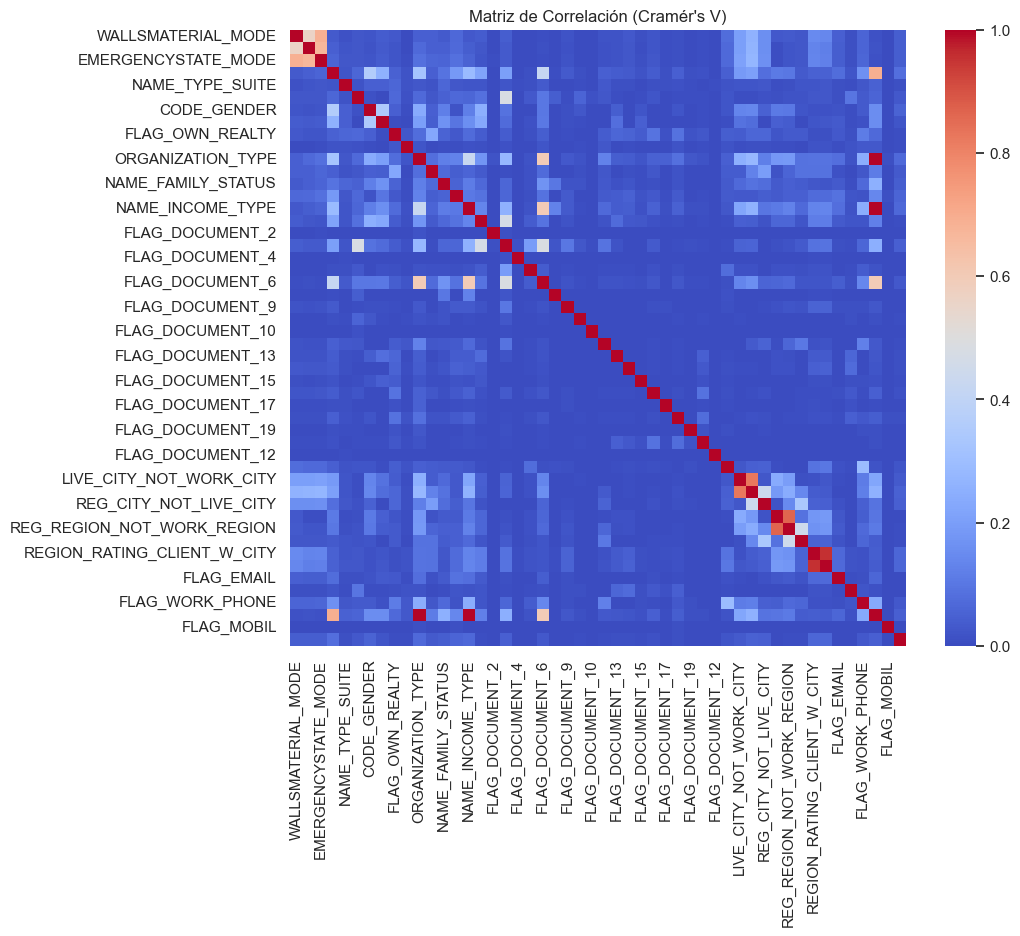


Pares de variables con alta correlación (entre 0.6 y 0.99):

WALLSMATERIAL_MODE ↔ EMERGENCYSTATE_MODE: 0.69
HOUSETYPE_MODE ↔ EMERGENCYSTATE_MODE: 0.67
OCCUPATION_TYPE ↔ FLAG_EMP_PHONE: 0.69
LIVE_CITY_NOT_WORK_CITY ↔ REG_CITY_NOT_WORK_CITY: 0.83
LIVE_REGION_NOT_WORK_REGION ↔ REG_REGION_NOT_WORK_REGION: 0.86
REGION_RATING_CLIENT_W_CITY ↔ REGION_RATING_CLIENT: 0.96


In [ ]:
from scipy.stats import chi2_contingency
f.cramers_v_heatmap_with_high_corr(df_loan_imputed_train, lista_categoricas_definitivo)

### Infernecia 

Estas relaciones destacan posibles redundancias y asociaciones importantes entre variables. Algunas de estas correlaciones sugieren que ciertas variables podrían ser proxies de fenómenos similares (como REGION_RATING_CLIENT_W_CITY ↔ REGION_RATING_CLIENT o LIVE_REGION_NOT_WORK_REGION ↔ REG_REGION_NOT_WORK_REGION), mientras que otras, como OCCUPATION_TYPE ↔ FLAG_EMP_PHONE, capturan características complementarias a tener en cuenta más tarde.

Es difícil sacar conclusiones de aquí debido a la alta cantidad de variables, además dado que las variables booleanas tienen solo dos categorías, es menos probable que muestren correlaciones fuertes con otras variables categóricas que tienen muchas categorías.

He decidido separar las variables categóricas en booleanas y categóricas no booleanas para simplificar y optimizar el análisis. Las variables booleanas, al tener únicamente dos valores (por ejemplo, Sí/No o 0/1), suelen representar características binarias específicas y se comportan de manera distinta en los modelos y análisis estadísticos. Esto permite tratarlas de forma separada, ya que no necesitan transformaciones adicionales y su interpretación es directa.

Por otro lado, las variables categóricas no booleanas tienen más de dos categorías y requieren un enfoque diferente, como la codificación mediante técnicas como one-hot encoding o embeddings, dependiendo del modelo que se utilice. Al dividirlas, puedo:

Adaptar mejor el preprocesamiento a las características de cada tipo de variable.
Evitar redundancias en el tratamiento, ya que muchas veces las booleanas pueden ser directamente utilizadas sin cambios.
Facilitar la interpretación del análisis, ya que las correlaciones, relaciones y su importancia en el modelo pueden variar según el tipo de variable.
Esta separación también contribuye a mantener un flujo de trabajo más claro y organizado, donde cada grupo de variables puede recibir el tratamiento más adecuado para su naturaleza y función dentro del análisis.

In [234]:
# Crear listas para variables booleanas y categóricas no booleanas
booleanas = []
categoricas_no_booleanas = []

for col in lista_categoricas_definitivo:
    if df_loan_imputed_train[col].nunique() == 2:
        booleanas.append(col)  # Si tiene 2 valores únicos, es booleana
    else:
        categoricas_no_booleanas.append(col)  # Si tiene más de 2 valores, es categórica no booleana

# Ver las listas resultantes
print("Booleanas:", booleanas)
print("Categóricas no booleanas:", categoricas_no_booleanas)

Booleanas: ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'TARGET']
Categóricas no booleanas: ['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'CODE_GENDER', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 

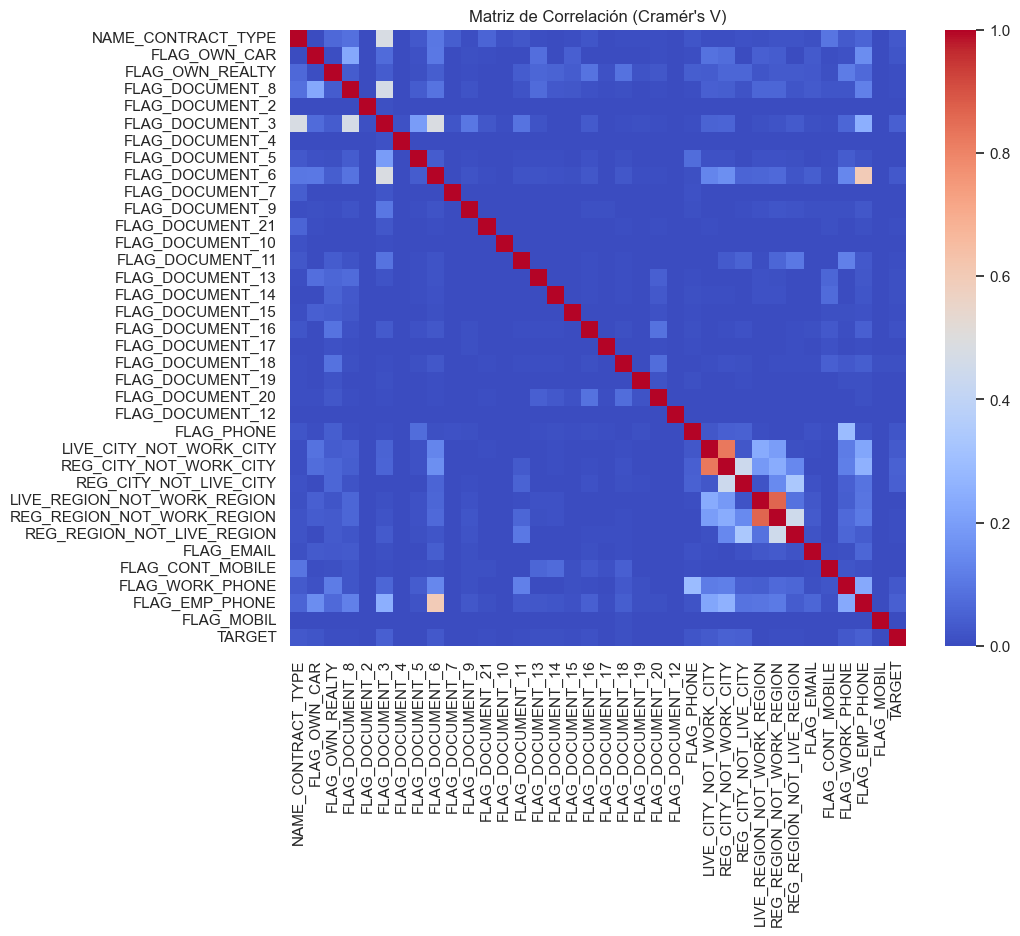


Pares de variables con alta correlación (entre 0.6 y 0.99):

LIVE_CITY_NOT_WORK_CITY ↔ REG_CITY_NOT_WORK_CITY: 0.83
LIVE_REGION_NOT_WORK_REGION ↔ REG_REGION_NOT_WORK_REGION: 0.86


In [ ]:
f.cramers_v_heatmap_with_high_corr(df_loan_imputed_train, booleanas)

### Inferencia variables booleanas

En el análisis de las variables booleanas, no se observan diferencias significativas entre las categorías. Esto era de esperarse, ya que este tipo de variables solo tiene dos posibles valores (1 o 0), lo que genera una relación más dicotómica y, en la mayoría de los casos, una correlación baja o inexistente con otras variables. Es decir, la naturaleza binaria de estas variables hace que, en muchos casos, las relaciones entre ellas no aporten información relevante para el análisis o para predecir la variable objetivo.

Entre las variables booleanas, destacan las correlaciones significativas entre LIVE_CITY_NOT_WORK_CITY y REG_CITY_NOT_WORK_CITY (0.83), así como entre LIVE_REGION_NOT_WORK_REGION y REG_REGION_NOT_WORK_REGION (0.86). Ambas parecen representar conceptos similares, relacionadas con la discrepancia entre el lugar de residencia, el trabajo y la dirección registrada del cliente.


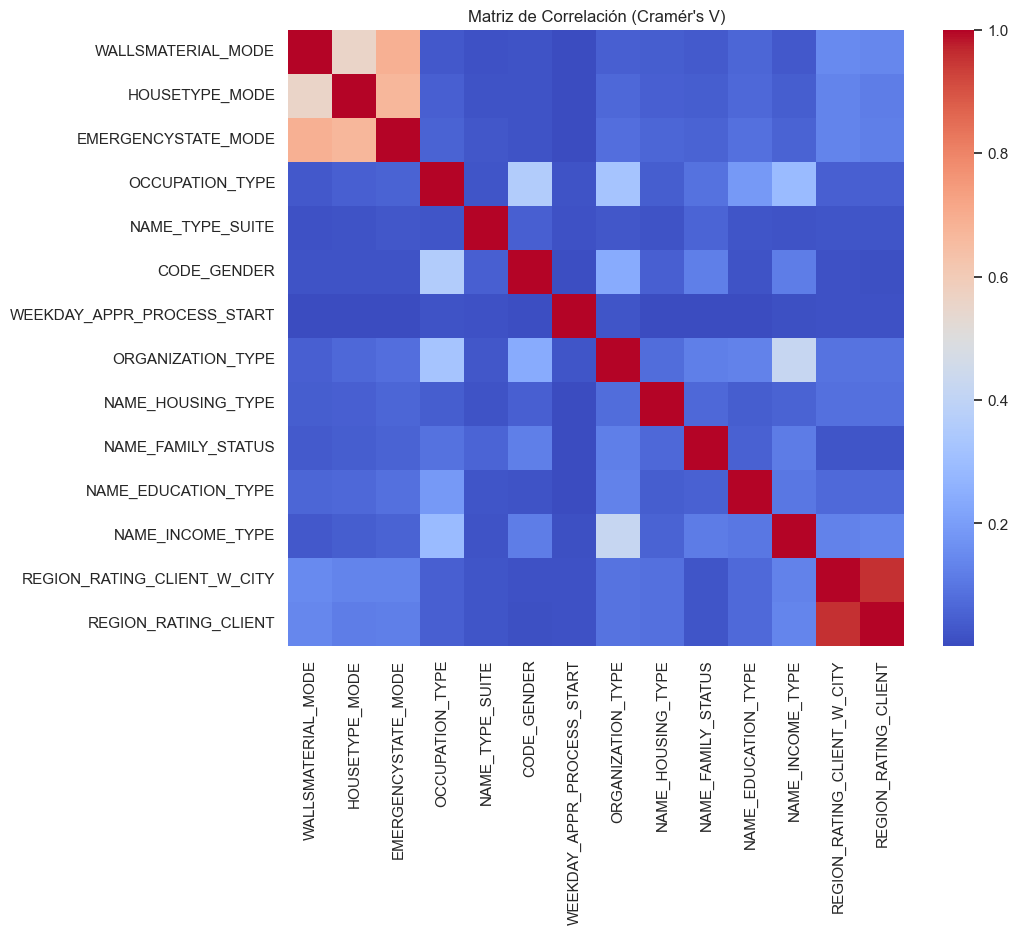


Pares de variables con alta correlación (entre 0.6 y 0.99):

WALLSMATERIAL_MODE ↔ EMERGENCYSTATE_MODE: 0.69
HOUSETYPE_MODE ↔ EMERGENCYSTATE_MODE: 0.67
REGION_RATING_CLIENT_W_CITY ↔ REGION_RATING_CLIENT: 0.96


In [ ]:
f.cramers_v_heatmap_with_high_corr(df_loan_imputed_train, categoricas_no_booleanas)


La relación observada entre WALLSMATERIAL_MODE y EMERGENCYSTATE_MODE, con una correlación de 0.69, sugiere que las características físicas de las viviendas están conectadas con la situación financiera de los clientes. Específicamente, el tipo de material utilizado en las paredes puede reflejar el nivel socioeconómico de los clientes. Viviendas construidas con materiales menos duraderos o más económicos podrían estar asociadas con personas en situaciones financieras más vulnerables, mientras que materiales de mayor calidad podrían estar vinculados con mayor estabilidad económica. Sin embargo, esta relación podría no ser directa y estar influenciada por factores externos, como los ingresos o la ubicación geográfica, que afectan tanto el tipo de vivienda como la probabilidad de estar en un estado de emergencia financiera.

En el caso de la relación entre HOUSETYPE_MODE y EMERGENCYSTATE_MODE, con una correlación de 0.67, se observa un patrón similar. El tipo de vivienda parece estar relacionado con los niveles de estabilidad financiera. Por ejemplo, los bloques de apartamentos, más comunes en áreas urbanas densamente pobladas, podrían estar asociados con clientes en situaciones más precarias debido a los costos de vida elevados o condiciones laborales menos estables. Por otro lado, viviendas individuales o adosadas, más típicas de zonas suburbanas o rurales, podrían reflejar un nivel mayor de estabilidad financiera. Este vínculo resalta cómo las características de la vivienda pueden ser un indicador indirecto del perfil económico del cliente.

Por último, la relación entre REGION_RATING_CLIENT_W_CITY y REGION_RATING_CLIENT, con una correlación extremadamente alta de 0.96, indica que estas variables miden prácticamente lo mismo. Ambas variables reflejan una evaluación del cliente basada en su región, pero con diferencias menores posiblemente relacionadas con si vive en áreas urbanas o rurales. Dado su alto nivel de redundancia, sería recomendable eliminar una de estas variables del modelo, ya que mantener ambas no aportaría información adicional significativa y podría complicar innecesariamente el análisis.

En conjunto, estas relaciones muestran cómo las características del entorno y las viviendas de los clientes pueden aportar información valiosa sobre su perfil financiero, mientras que otras variables redundantes, como las calificaciones regionales, pueden ser simplificadas para mejorar la eficiencia del modelo.








In [ ]:
confusion_matrix = pd.crosstab(df_loan_imputed_train["TARGET"], df_loan_imputed_train["HOUSETYPE_MODE"])
print(confusion_matrix)
f.cramers_v(confusion_matrix.values)

HOUSETYPE_MODE  block of flats  sin_valor  specific housing  terraced house
TARGET                                                                     
0                       111944     112250              1072             882
1                         8401      11259               119              81


0.03917487898293148

In [ ]:
confusion_matrix = pd.crosstab(df_loan_imputed_train["TARGET"], df_loan_imputed_train["OCCUPATION_TYPE"])
print(confusion_matrix)
f.cramers_v(confusion_matrix.values)

OCCUPATION_TYPE  Accountants  Cleaning staff  Cooking staff  Core staff  \
TARGET                                                                    
0                       7400            3344           4285       20531   
1                        367             365            506        1370   

OCCUPATION_TYPE  Drivers  HR staff  High skill tech staff  IT staff  Laborers  \
TARGET                                                                          
0                  13197       429                   8590       401     39597   
1                   1676        29                    583        28      4653   

OCCUPATION_TYPE  Low-skill Laborers  Managers  Medicine staff  \
TARGET                                                          
0                              1387     16001            6329   
1                               304      1059             469   

OCCUPATION_TYPE  Private service staff  Realty agents  Sales staff  \
TARGET                                     

0.08044026310829959

# EXTRA  

## Weight of Evidence (WoE)
El Weight of Evidence (WoE) mide la relación entre una categoría de una variable independiente y una variable objetivo binaria. Es útil para evaluar la capacidad predictiva de una categoría y se calcula como:

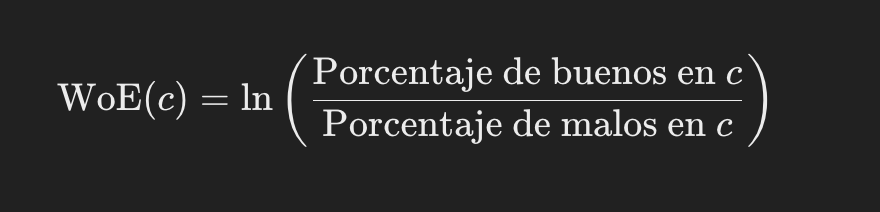

Donde:
- Buenos (Good): Representan el valor 0 en la variable objetivo.
- Malos (Bad): Representan el valor 1 en la variable objetivo.

El WoE transforma las categorías en valores numéricos que son interpretables:
- Valores positivos indican que una categoría está más asociada con buenos (menos riesgo).
- Valores negativos indican que está más asociada con malos (más riesgo).

## Information Value (IV)
El Information Value (IV) cuantifica la capacidad predictiva de una variable completa, evaluando cuánto discrimina entre buenos y malos. Se calcula como:

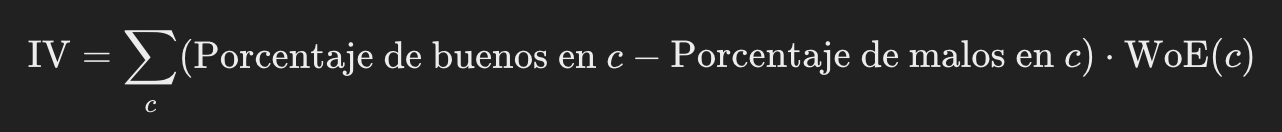

Rango del IV:

- < 0.02: Sin valor predictivo.
- 0.02 - 0.1: Bajo valor predictivo.
- 0.1 - 0.3: Moderado valor predictivo.
- '> 0.3: Alto valor predictivo.



In [269]:
woe_table1, iv1 = f.calculate_woe_iv(df_loan_train, feature='CODE_GENDER', target='TARGET')
woe_table2, iv2 = f.calculate_woe_iv(df_loan_train, feature='NAME_INCOME_TYPE', target='TARGET')
woe_table3, iv3 = f.calculate_woe_iv(df_loan_train, feature='HOUSETYPE_MODE', target='TARGET')

print(woe_table1)
print(f"Information Value (IV) total: {iv1}")

print('-------------------------------------------------------------')

print(woe_table2)
print(f"Information Value (IV) total: {iv2}")

print('-------------------------------------------------------------')

print(woe_table3)
print(f"Information Value (IV) total: {iv3}")



             good_dist  bad_dist        WoE        IV
CODE_GENDER                                          
F             0.665613  0.570896   0.153501  0.014539
M             0.334370  0.429104  -0.249452  0.023632
XNA           0.000018  0.000000  12.083200  0.000214
Information Value (IV) total: 0.03838438738260739
-------------------------------------------------------------
                      good_dist  bad_dist        WoE        IV
NAME_INCOME_TYPE                                              
Businessman            0.000031  0.000000  12.642816  0.000391
Commercial associate   0.234815  0.215156   0.087435  0.001719
Maternity leave        0.000013  0.000101  -2.027017  0.000177
Pensioner              0.185237  0.121047   0.425455  0.027310
State servant          0.071957  0.050352   0.357025  0.007713
Student                0.000066  0.000000  13.404956  0.000889
Unemployed             0.000053  0.000403  -2.027017  0.000709
Working                0.507827  0.612941  -0.18812

1. CODE_GENDER
La variable tiene un IV bajo (0.0384), indicando bajo poder predictivo. Las mujeres (F) están asociadas con menor riesgo (WoE: 0.1535), mientras que los hombres (M) tienen mayor riesgo relativo (WoE: -0.2495). La categoría XNA tiene un WoE extremo, pero su baja frecuencia la hace irrelevante.

2. NAME_INCOME_TYPE
Con un IV moderado (0.0587), esta variable aporta más valor predictivo. Las categorías Pensioner (WoE: 0.4255) y State servant (WoE: 0.3570) están asociadas con menor riesgo, mientras que Working (WoE: -0.1881) muestra mayor riesgo relativo. Categorías como Student o Businessman tienen WoEs altos por baja frecuencia, con impacto mínimo.

3. HOUSETYPE_MODE
El IV es muy bajo (0.0021), lo que indica que la variable no es relevante para discriminar entre "buenos" y "malos". Las categorías Specific housing (WoE: -0.3853) y Terraced house (WoE: -0.1957) muestran un leve mayor riesgo, pero el impacto general es insignificante.

# 4. Guardado de tablas 

In [245]:
df_loan_imputed_train.to_csv('./data/train_data_processed.csv', index=False)
df_loan_imputed_test.to_csv('./data/test_data_processed.csv', index=False)